In [4]:
import sympy as sm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [5]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
              
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

In [6]:
pars = pd.read_csv("C:/SDMS/trophic_temp/param_hycub_H2.csv")

In [7]:
par1 = np.array(pars)
np.shape(par1)

(10, 1000)

# Architype - 1 #
* Smooth curves in the resource oscillations *

In [8]:
i=0
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

In [9]:
u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)

(2.241844911, 5.33e-05, 0.327153161, 0.487158819, 0.249835122, 0.051222569, 0.003081126, 0.487768621, 0.516552535, 0.231934724)


In [10]:
start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

71.53484939993359


In [11]:
ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

<IPython.core.display.Javascript object>


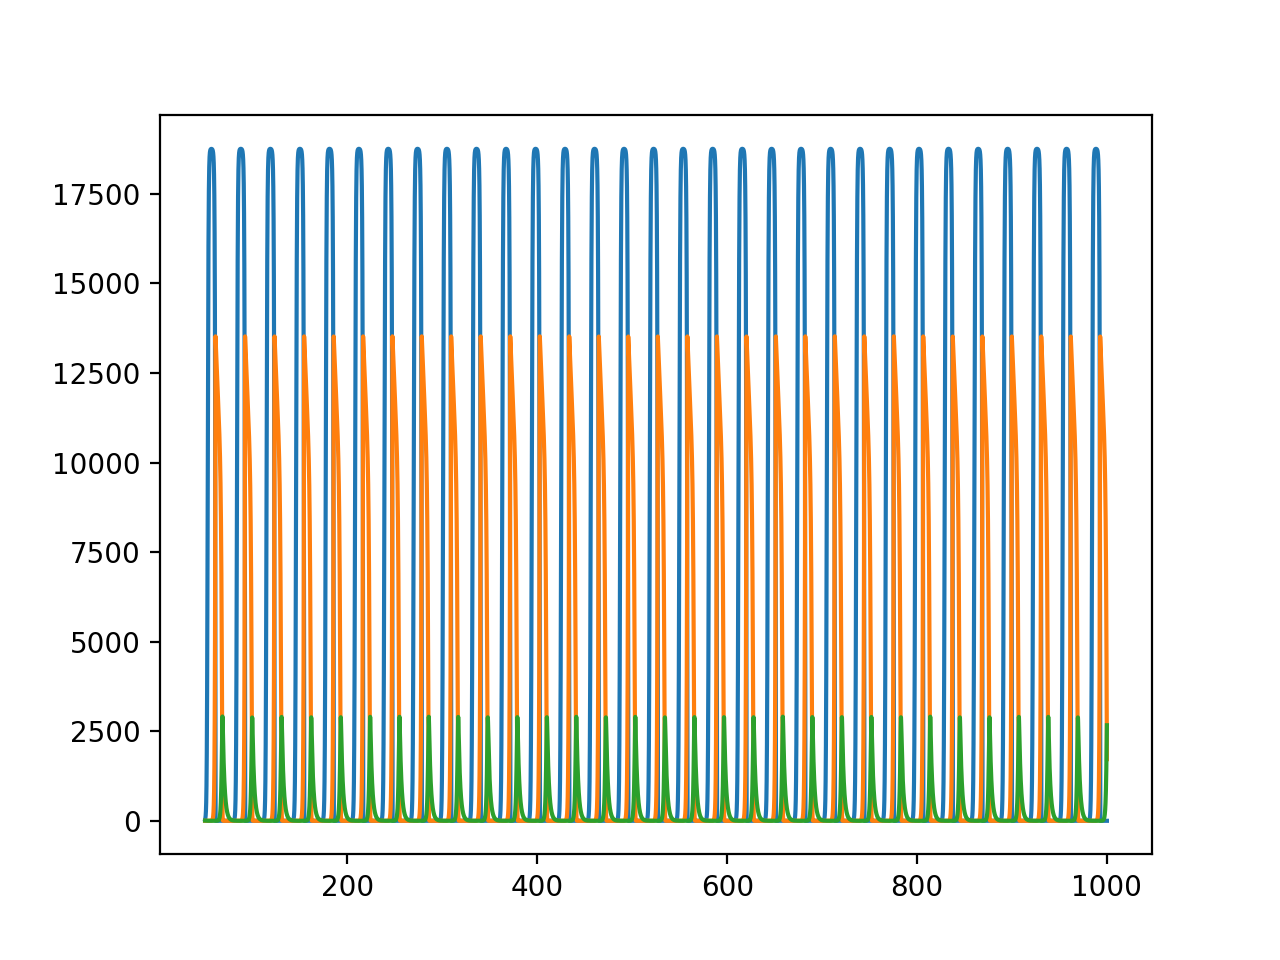

In [14]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


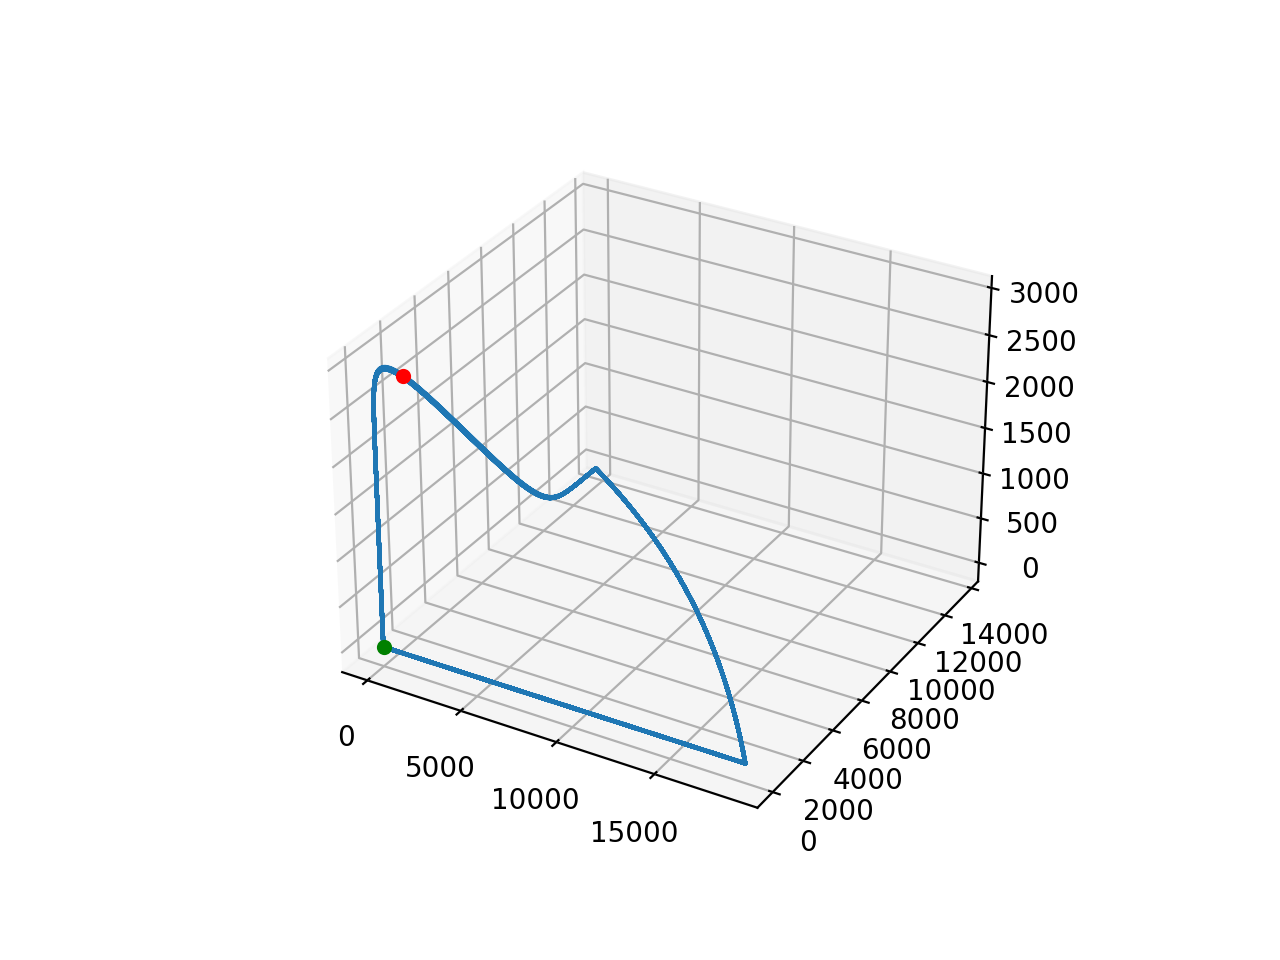

In [13]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')



# Architype - 2 #
* Rectangle curves in the resource - stiff equations *

In [16]:
i=5
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]


In [17]:
u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)



(5.194205954, 9.49e-05, 0.463984531, 0.344578616, 0.109664092, 0.641389586, 0.155445622, 0.519464473, 0.217775041, 0.266881795)


In [18]:
start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

7.037206299952231


In [19]:
ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

<IPython.core.display.Javascript object>


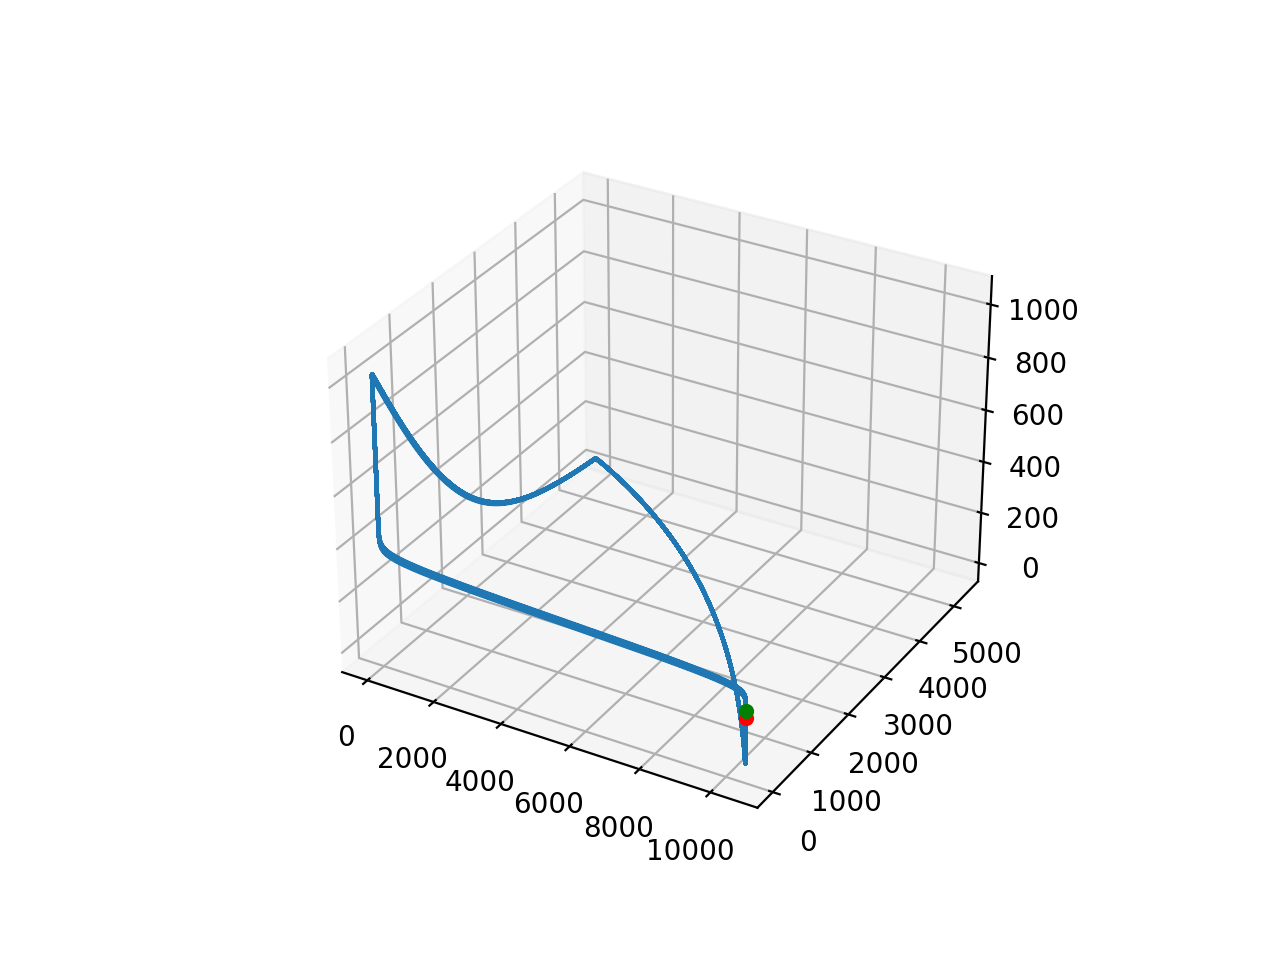

In [20]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


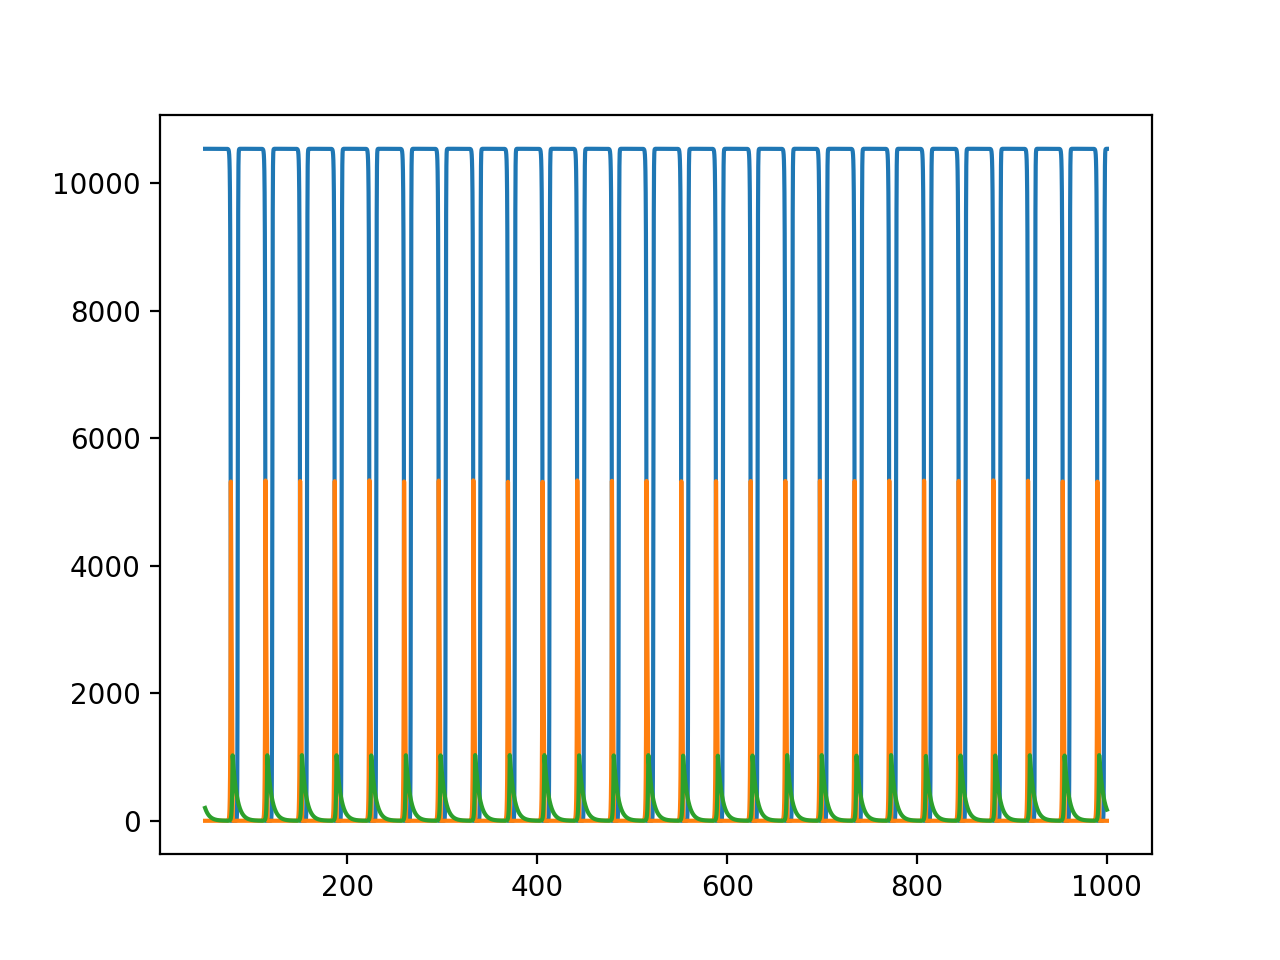

In [21]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype - 3 #
* Almost rectangle curves and donot drop to 0 in resources *

In [28]:
i=2
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)

start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(1.056923475, 5.91e-05, 0.121164906, 0.473825827, 0.28133339, 0.4563816, 0.330584423, 0.53344495, 0.377527288, 0.038994156)
0.9757007999578491


<IPython.core.display.Javascript object>


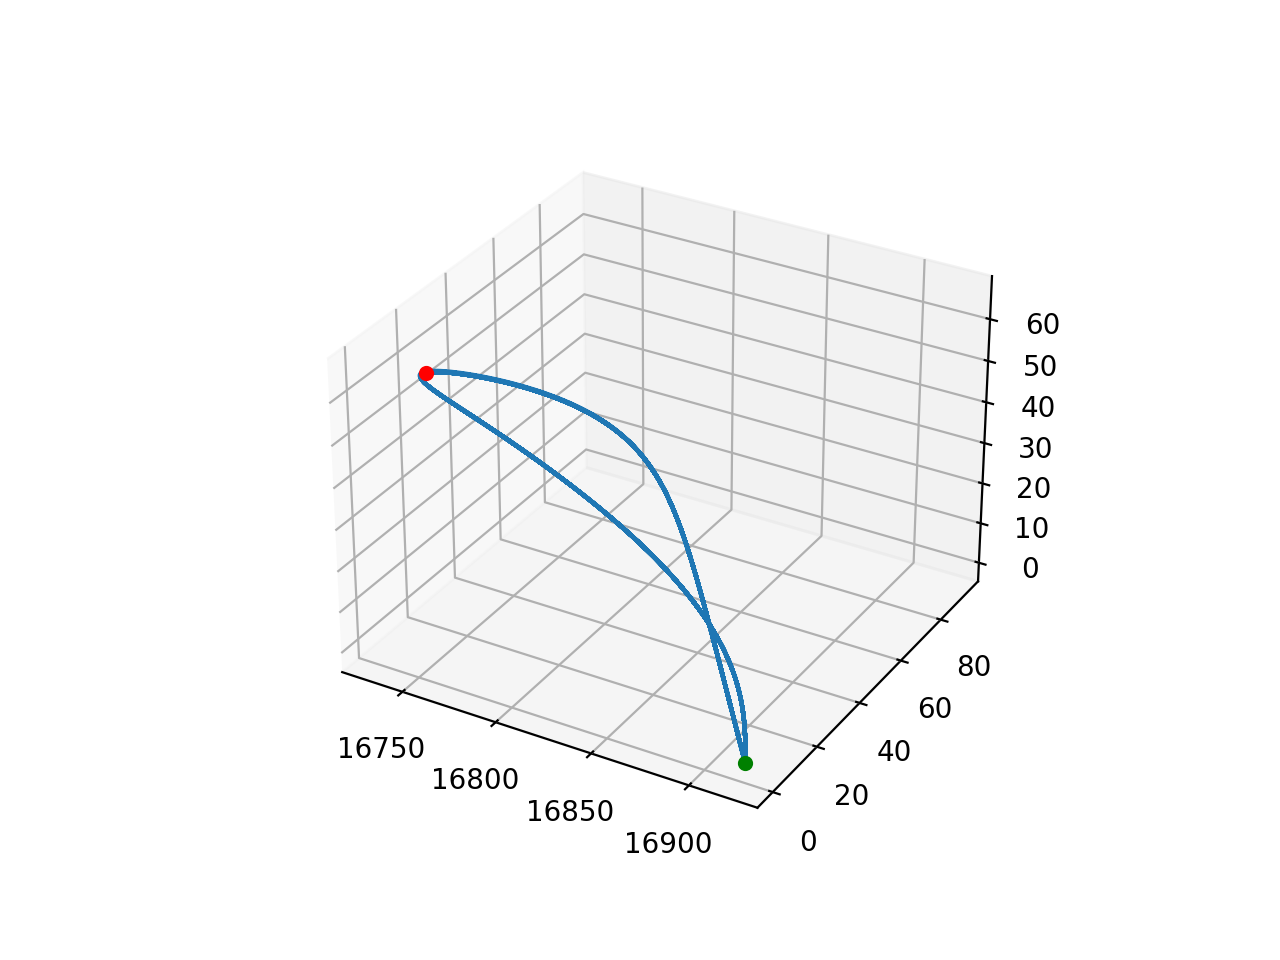

In [29]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


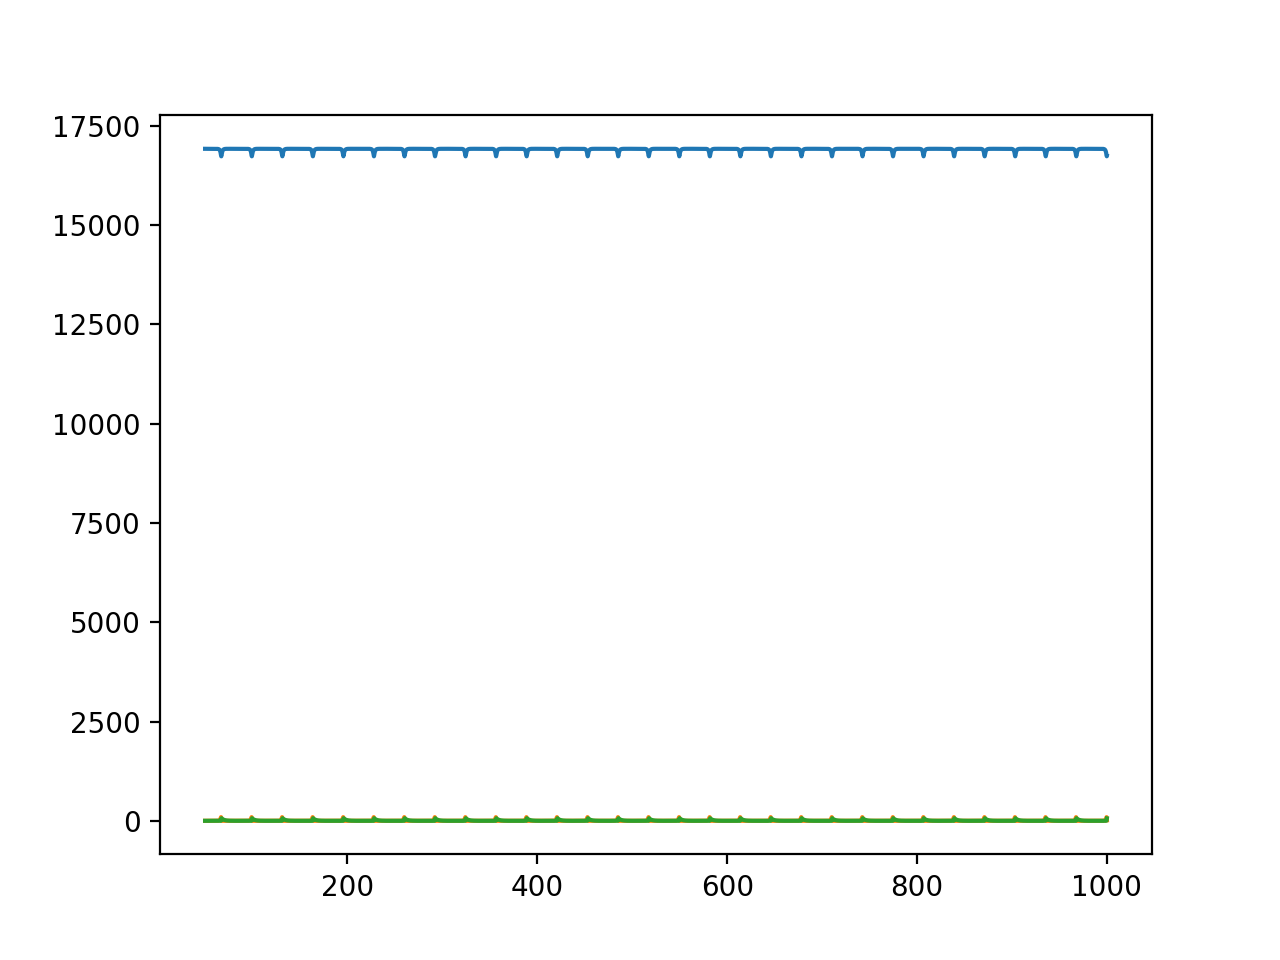

In [30]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

In [31]:
i=9
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 

(4.556919415, 3.57e-05, 0.489624139, 0.090623903, 0.101580019, 0.687127459, 0.265969288, 0.429098841, 0.143169454, 0.085732761)
0.49100210005417466


<IPython.core.display.Javascript object>


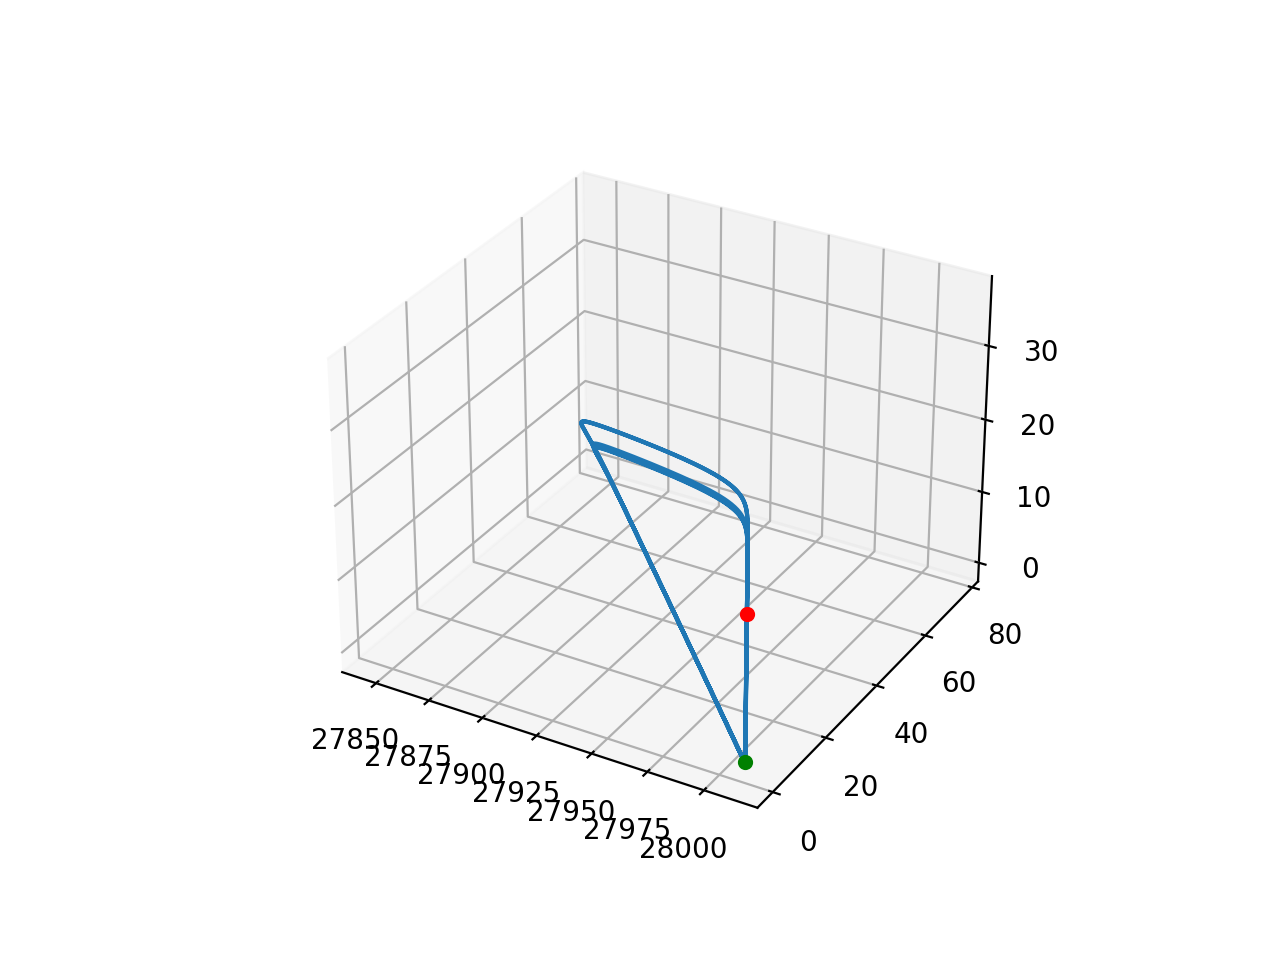

In [32]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


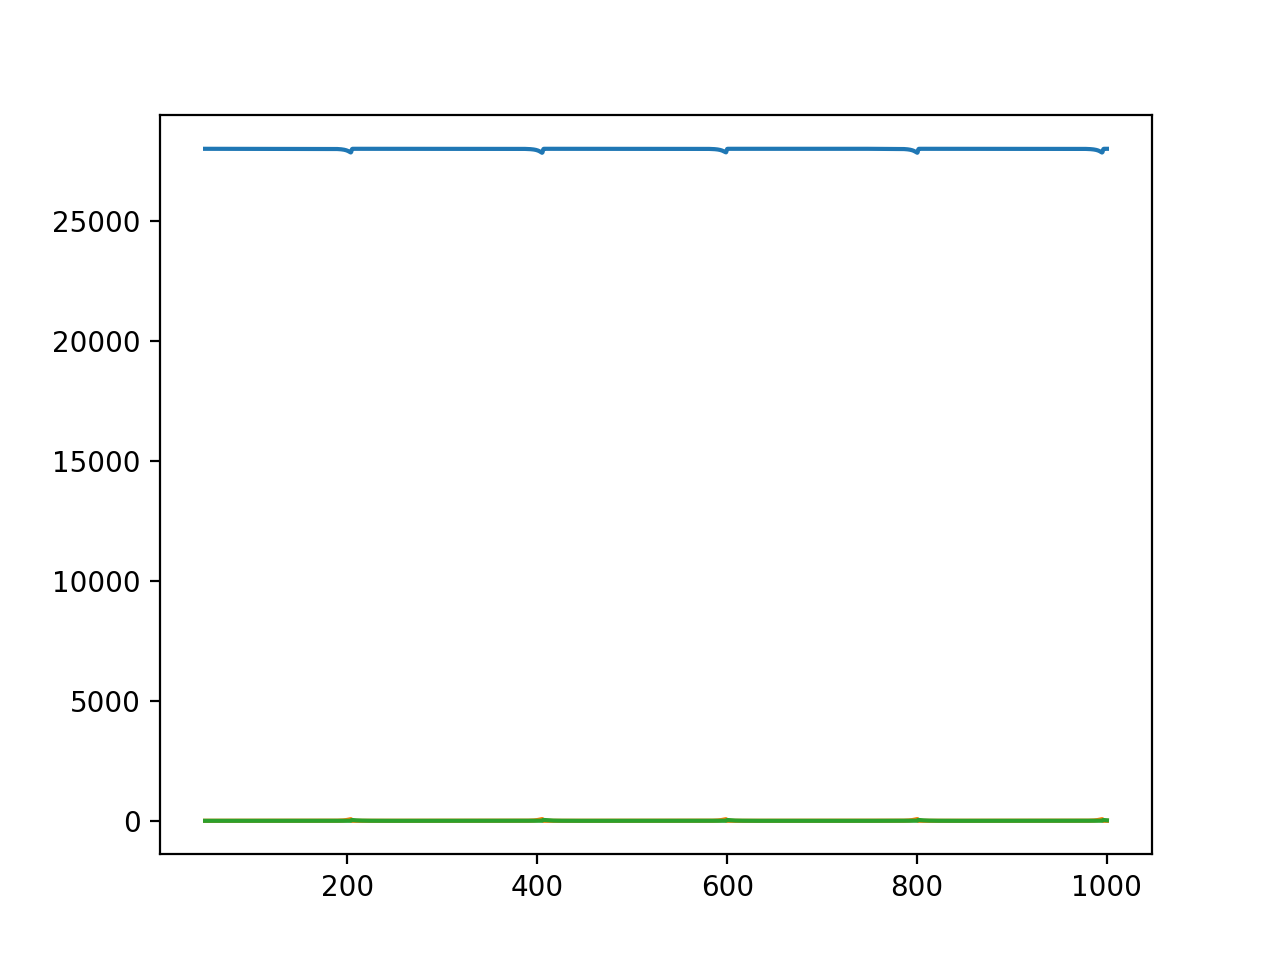

In [33]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)


# Architype - 4 #
* 3D system becomes a 2D system 

In [34]:
i=11
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        

(4.374202457, 6.76e-05, 0.164568353, 0.318652413, 0.085716102, 0.638216396, 0.234586987, 0.478184867, 0.792609724, 0.432760976)
9.471494999947026


<IPython.core.display.Javascript object>


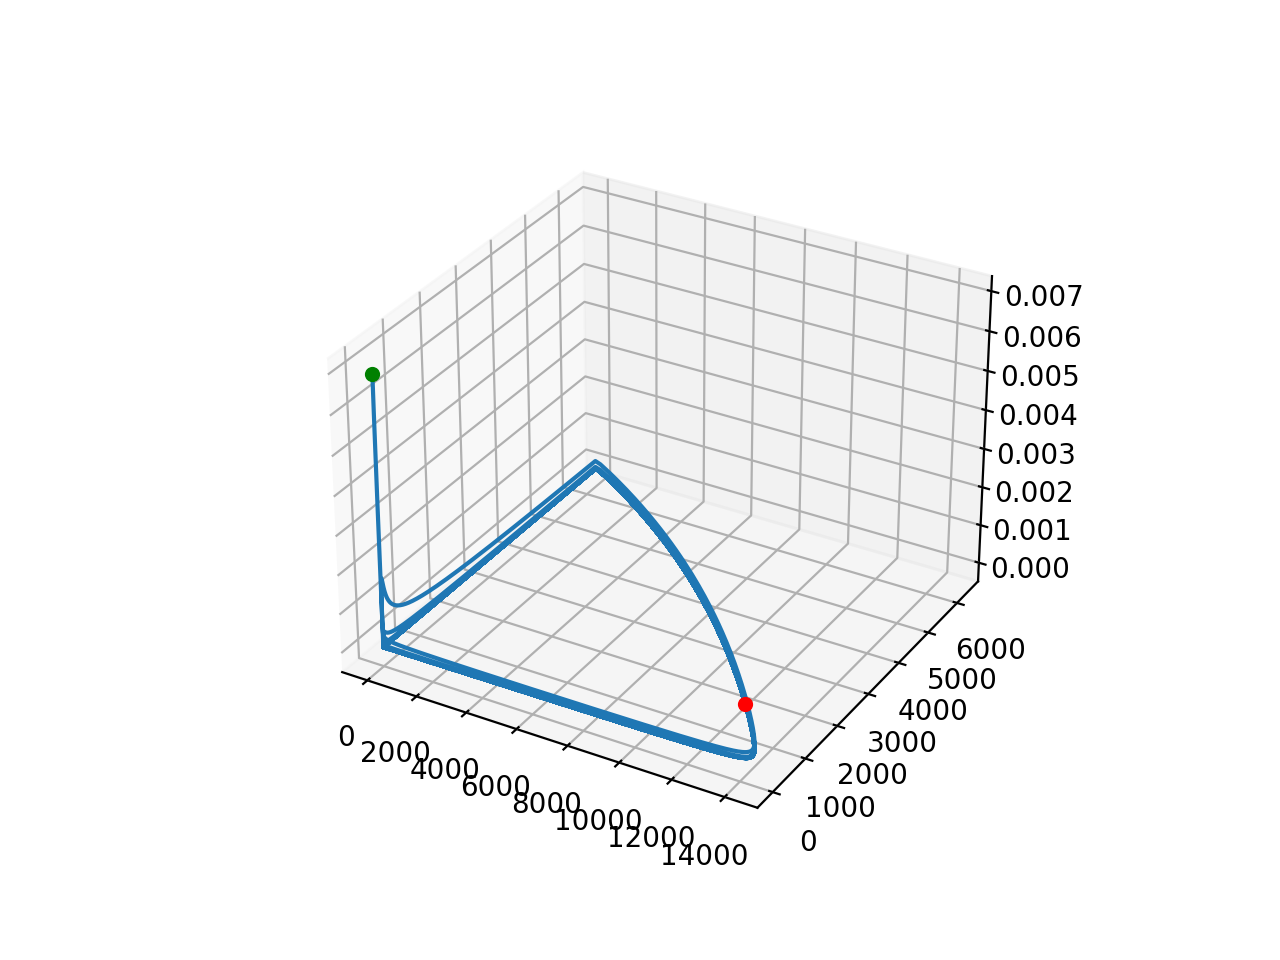

In [35]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


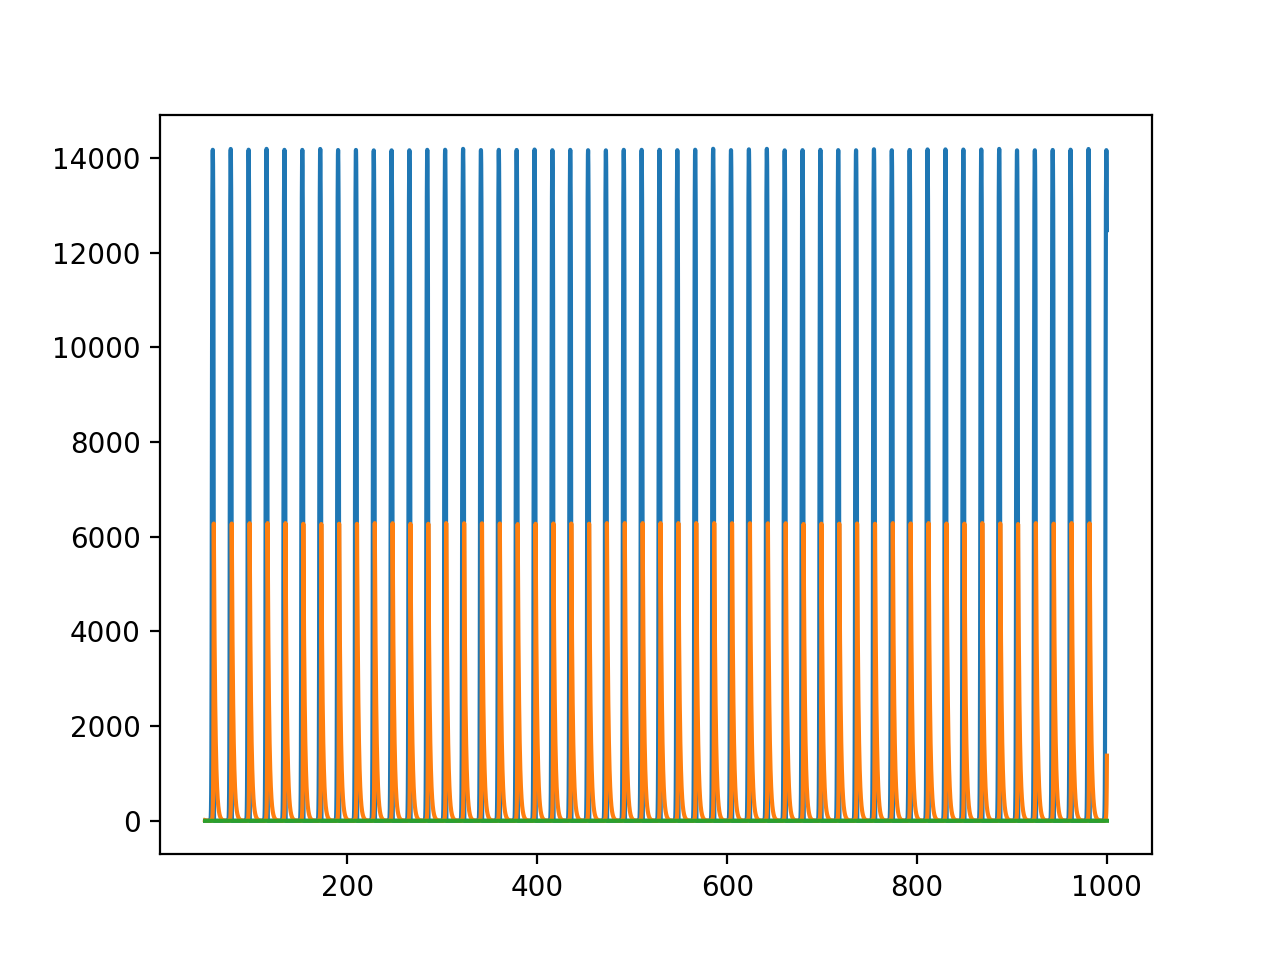

In [36]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype - 1a #
* The oscillations do not show a constant amplitute

In [43]:
i=15
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 5000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(0.08447798, 9.24e-05, 0.3121452, 0.319369628, 0.424376233, 0.146119773, 0.381345731, 0.581305444, 0.700911828, 0.17289417)
6.420859000063501


<IPython.core.display.Javascript object>


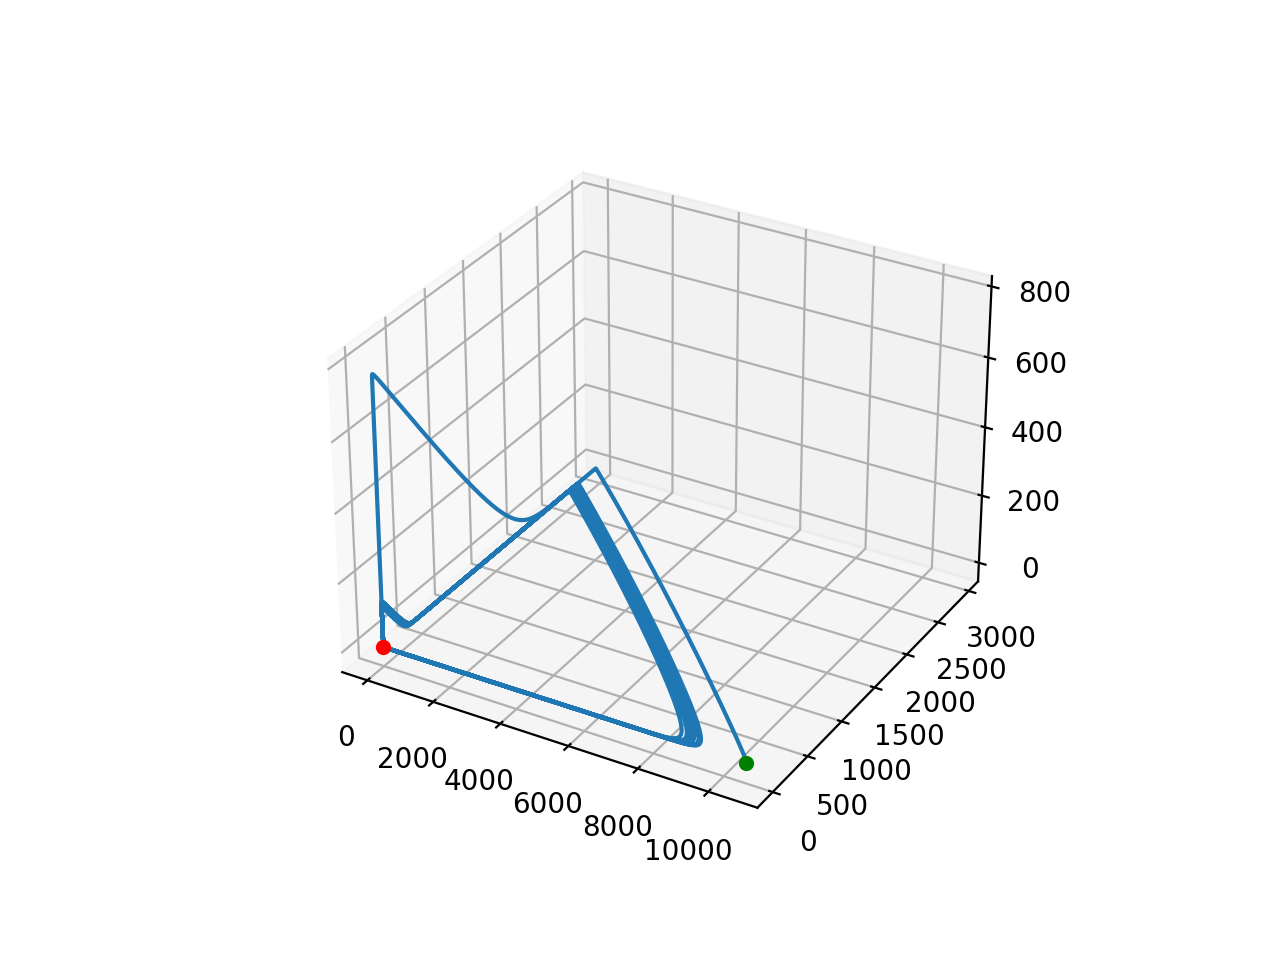

In [44]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


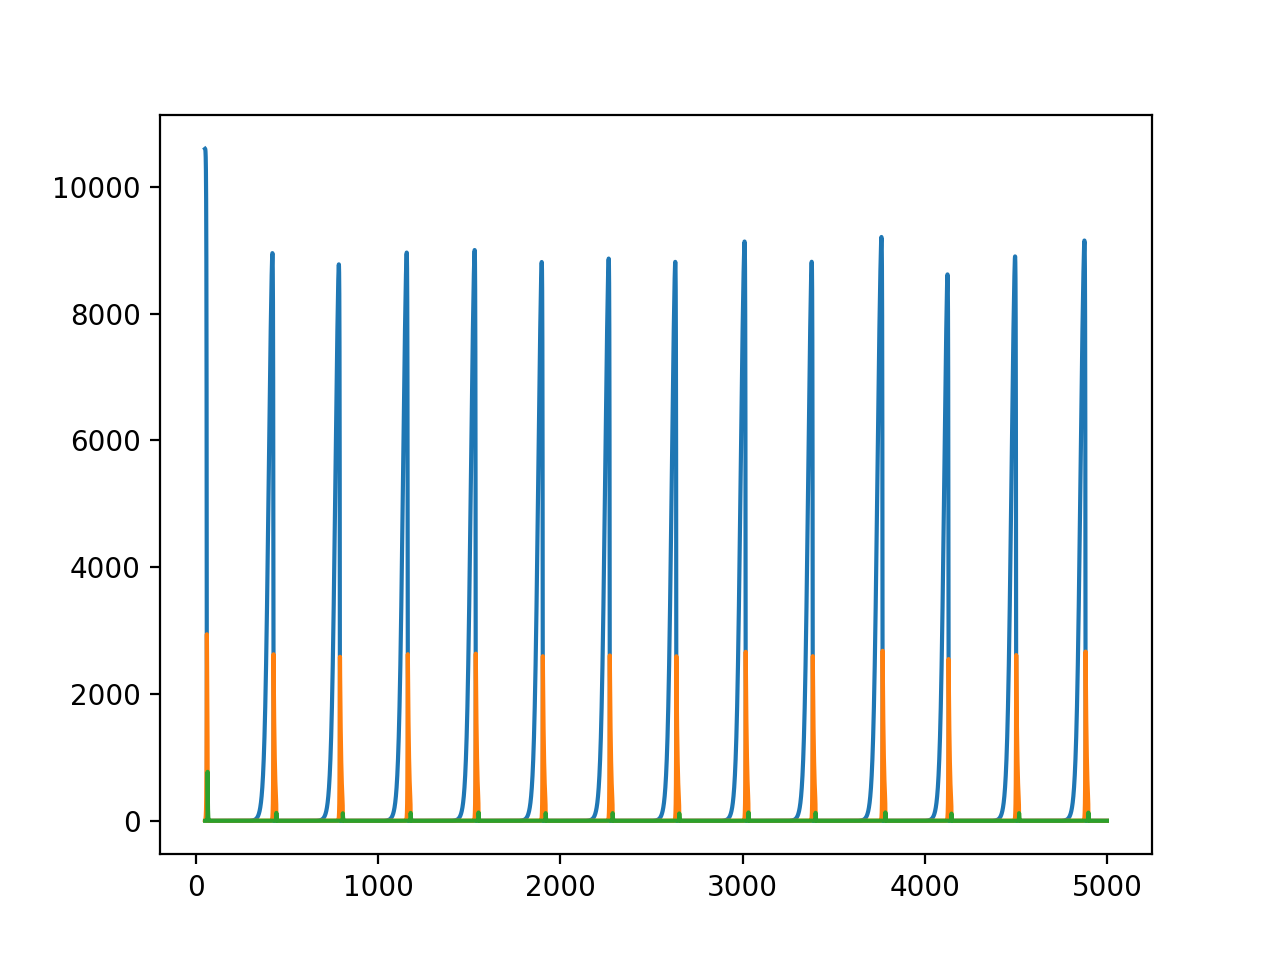

In [45]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype - 5 #
* Saw-tooth like oscillations in the resources and does not go to 0 

In [74]:
i=16
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(0.041745524, 6.7e-05, 0.036341158, 0.423523459, 0.255759779, 0.660986312, 0.691120884, 0.191653259, 0.420631075, 0.005533364)
0.772936400026083


<IPython.core.display.Javascript object>


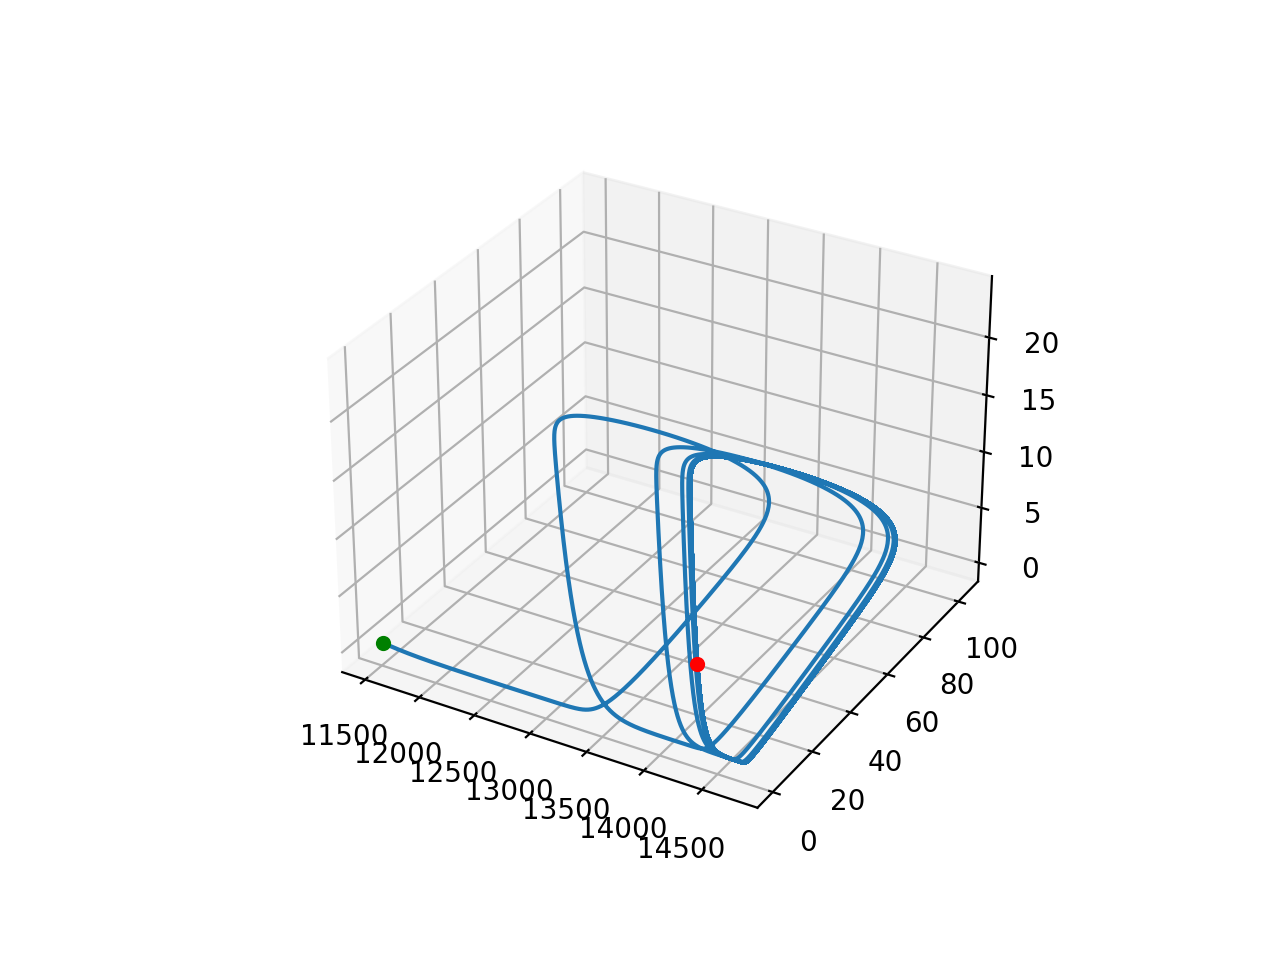

In [75]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


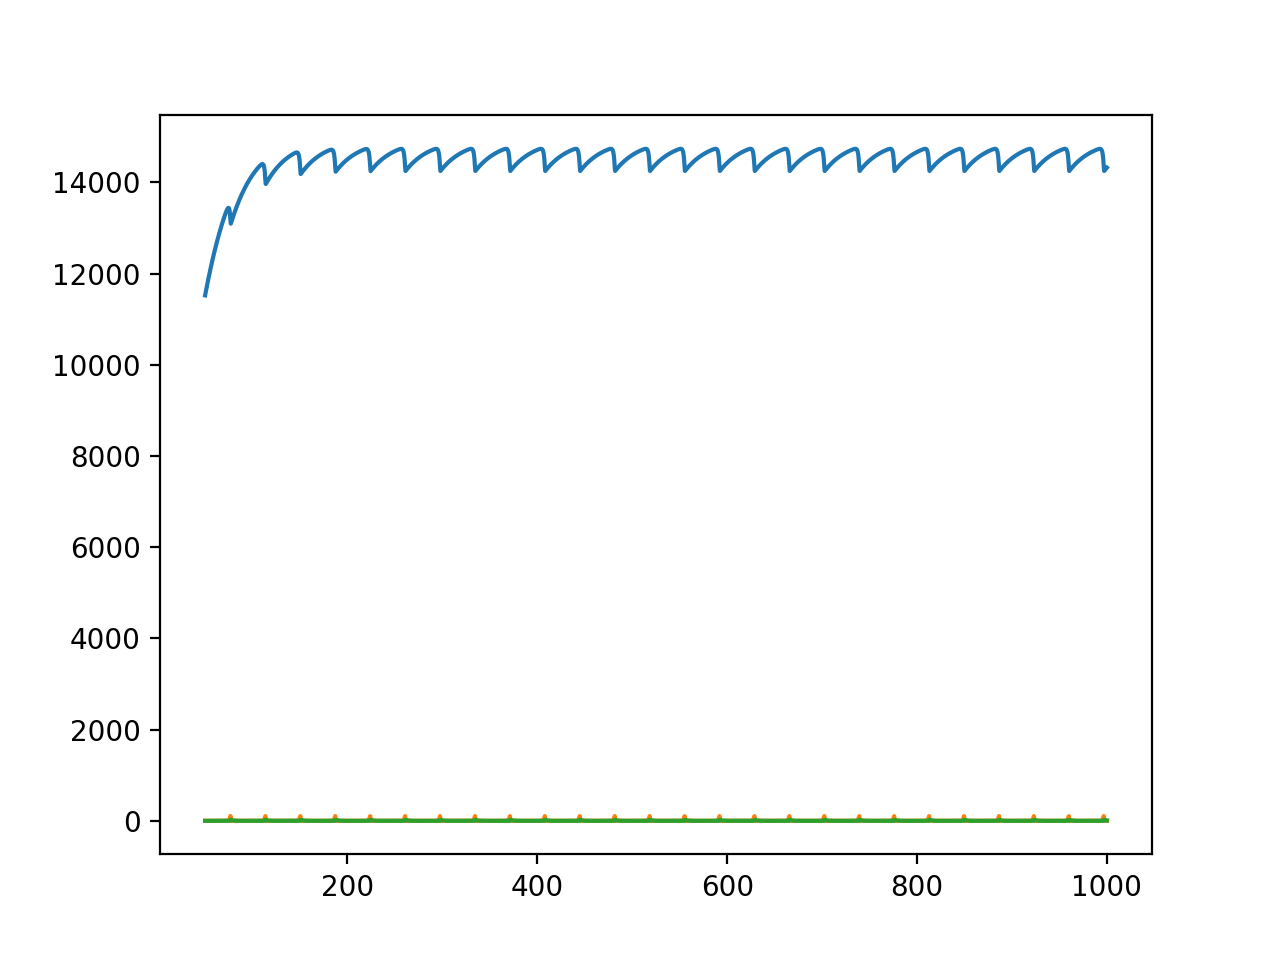

In [76]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype - 2a #
* Resource oscillations have 2 frequencies 

In [52]:
i=27
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 3000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(5.356775638, 4.69e-05, 0.282586628, 0.100425608, 0.327196682, 0.010953123, 0.522025931, 0.481578253, 0.61731259, 0.37100419)
142.0113798000384


<IPython.core.display.Javascript object>


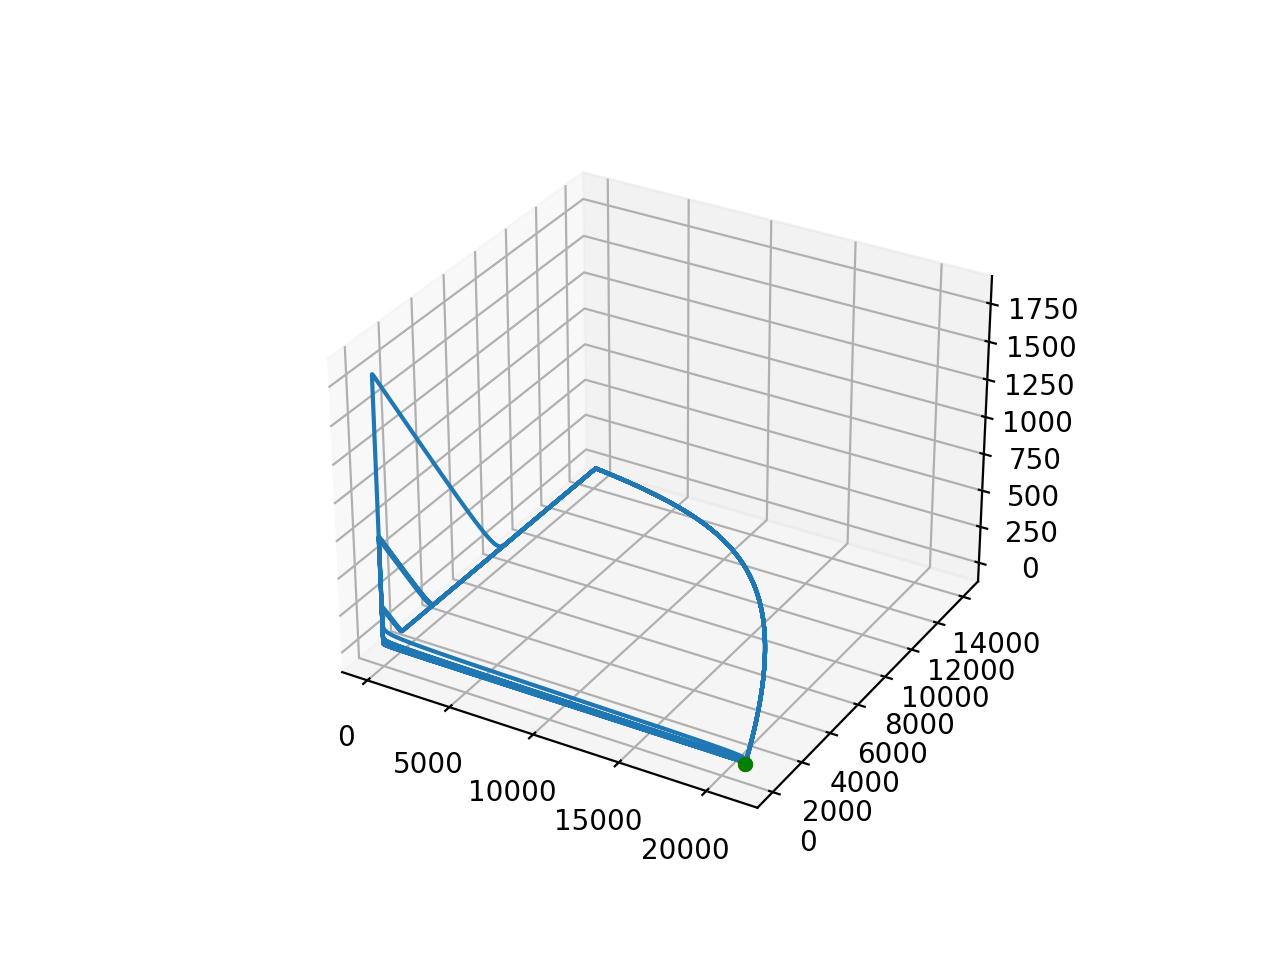

In [55]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


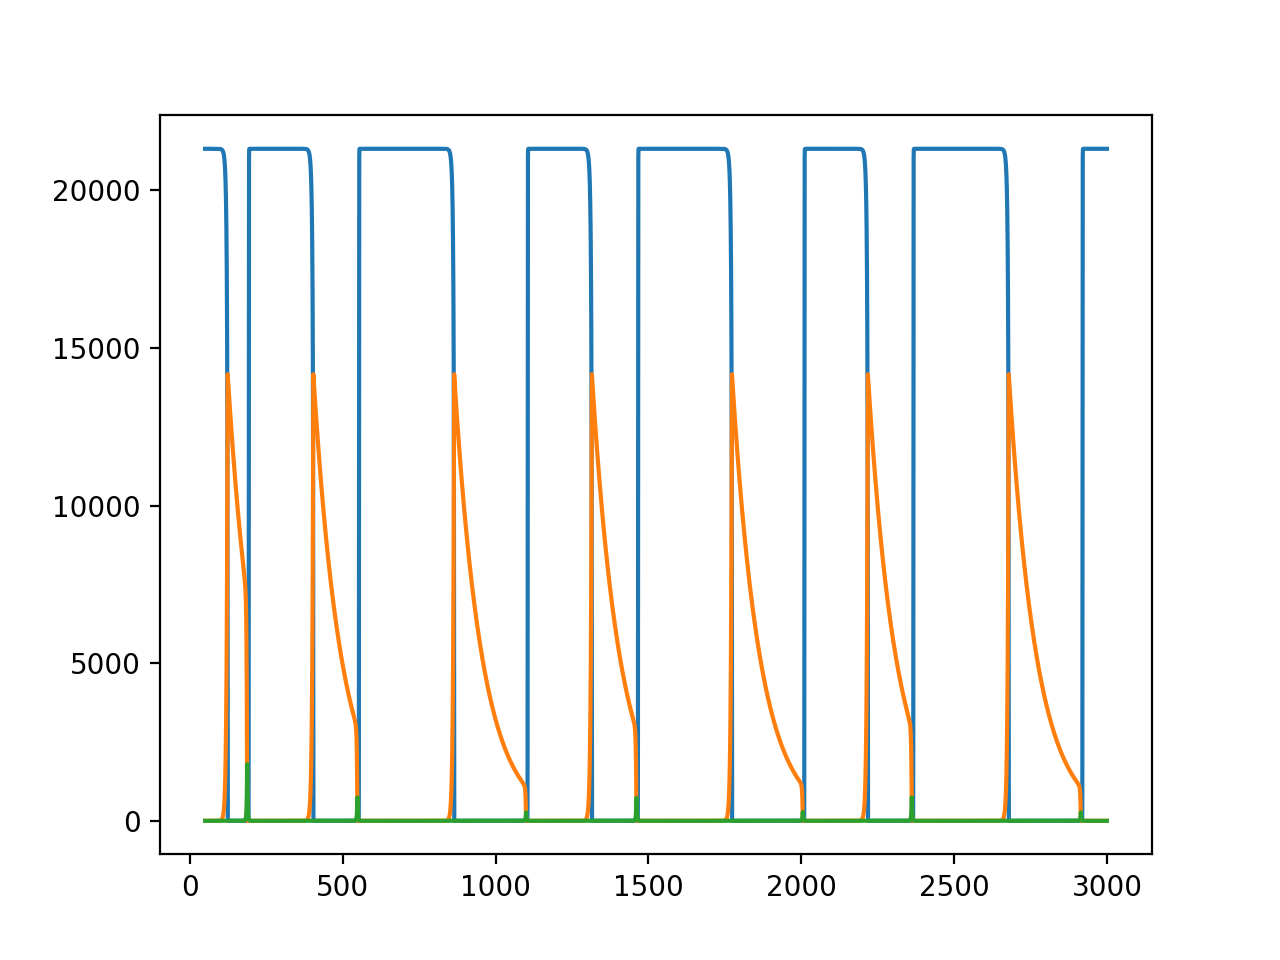

In [54]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype 2b #
* Constant amplitute in the resources
* Multiple amplitudes in the predators

In [56]:
i=28
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(3.923406878, 8.31e-05, 0.223945672, 0.093004216, 0.243751139, 0.045062418, 0.177428399, 0.39684122, 0.674434749, 0.077751438)
4.062838100013323


<IPython.core.display.Javascript object>


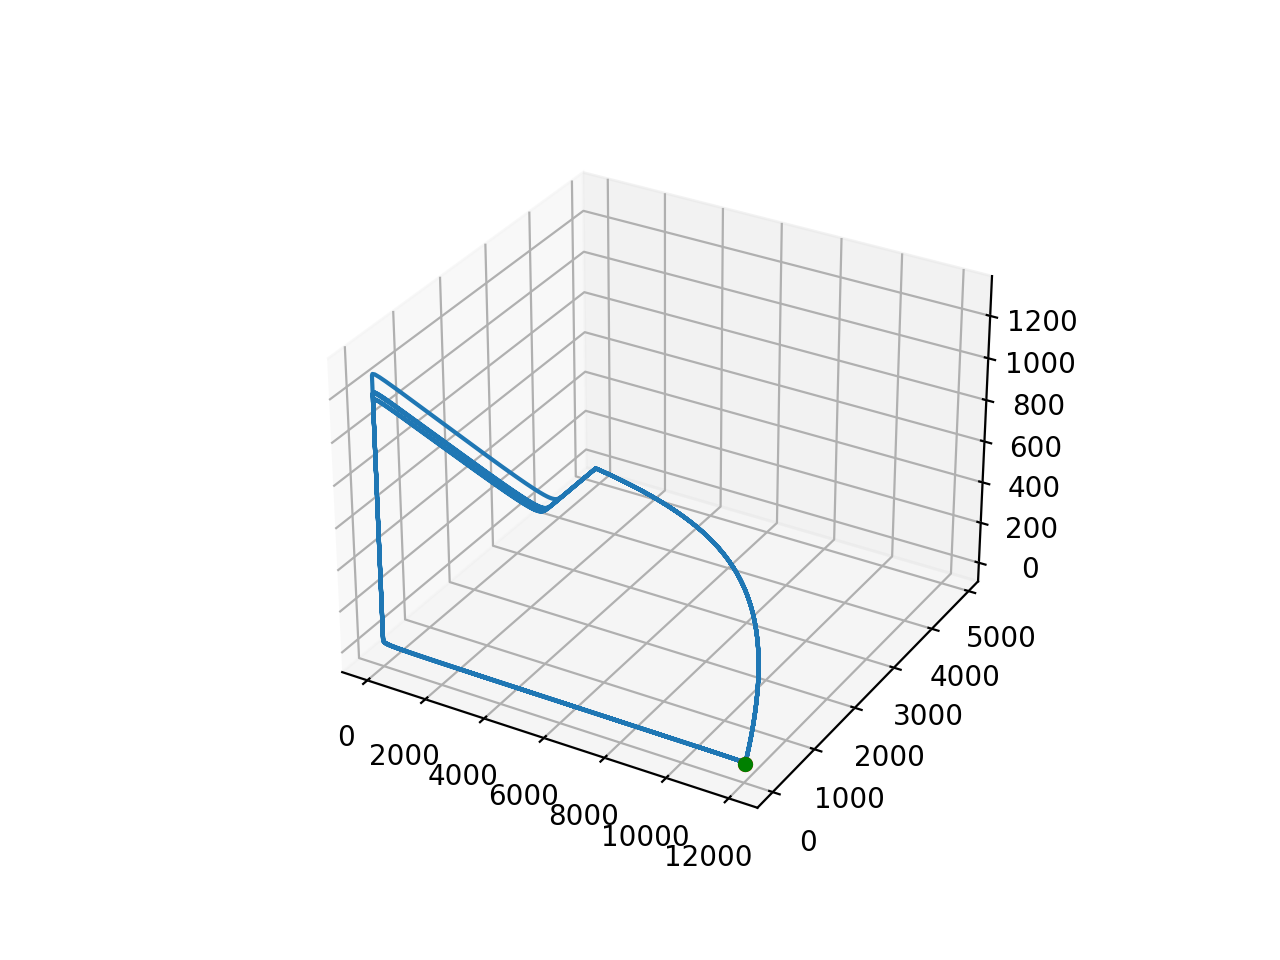

In [57]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


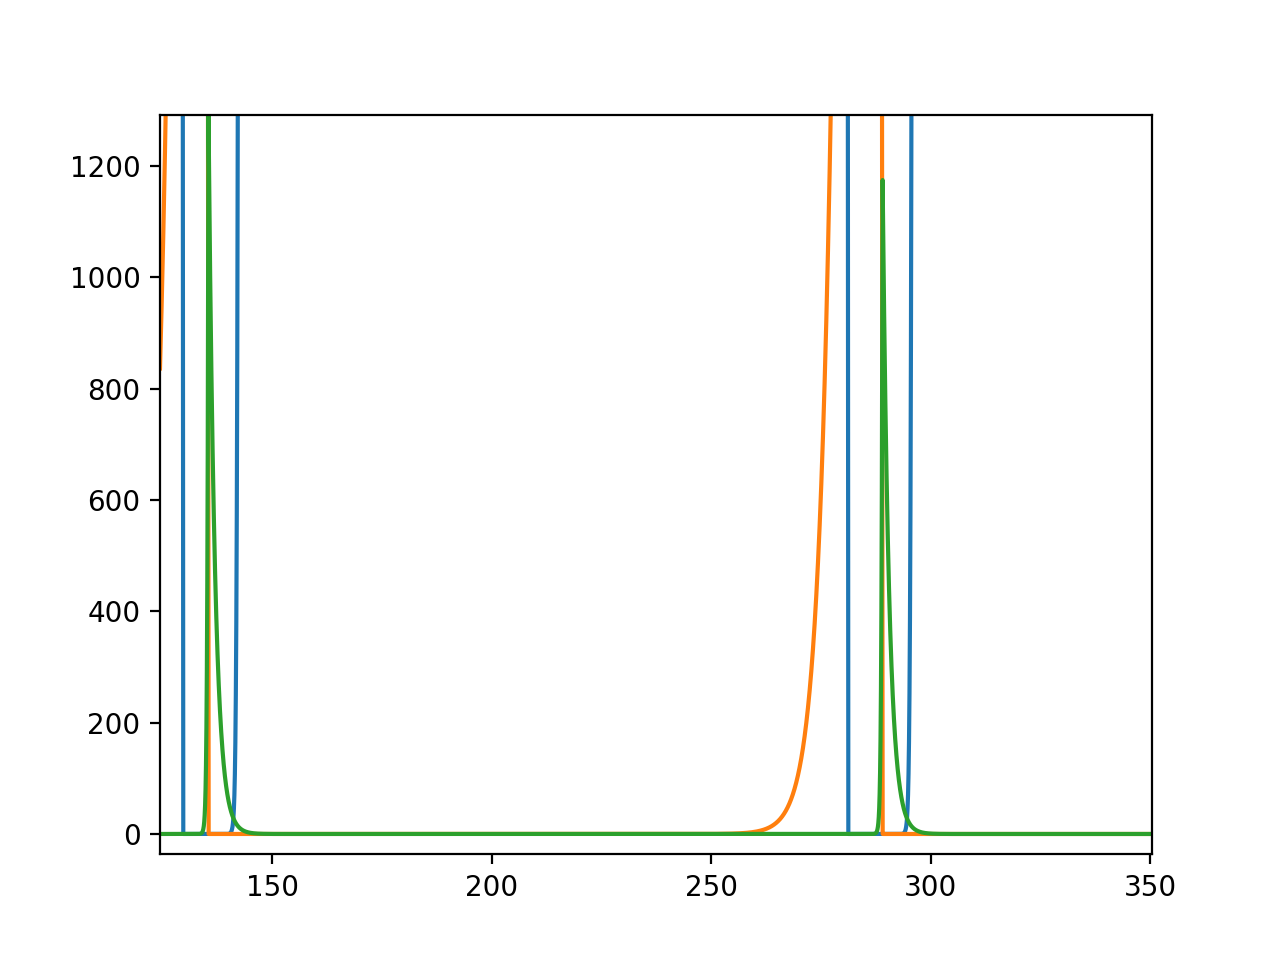

In [58]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype - 3a #
* Multiple amplitudes

In [59]:
i=29
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]


(4.033404899, 1.55e-06, 0.154634439, 0.127379398, 0.183151573, 0.069762807, 0.612989561, 0.19492492, 0.568700502, 0.001248384)
0.8250788999721408


<IPython.core.display.Javascript object>


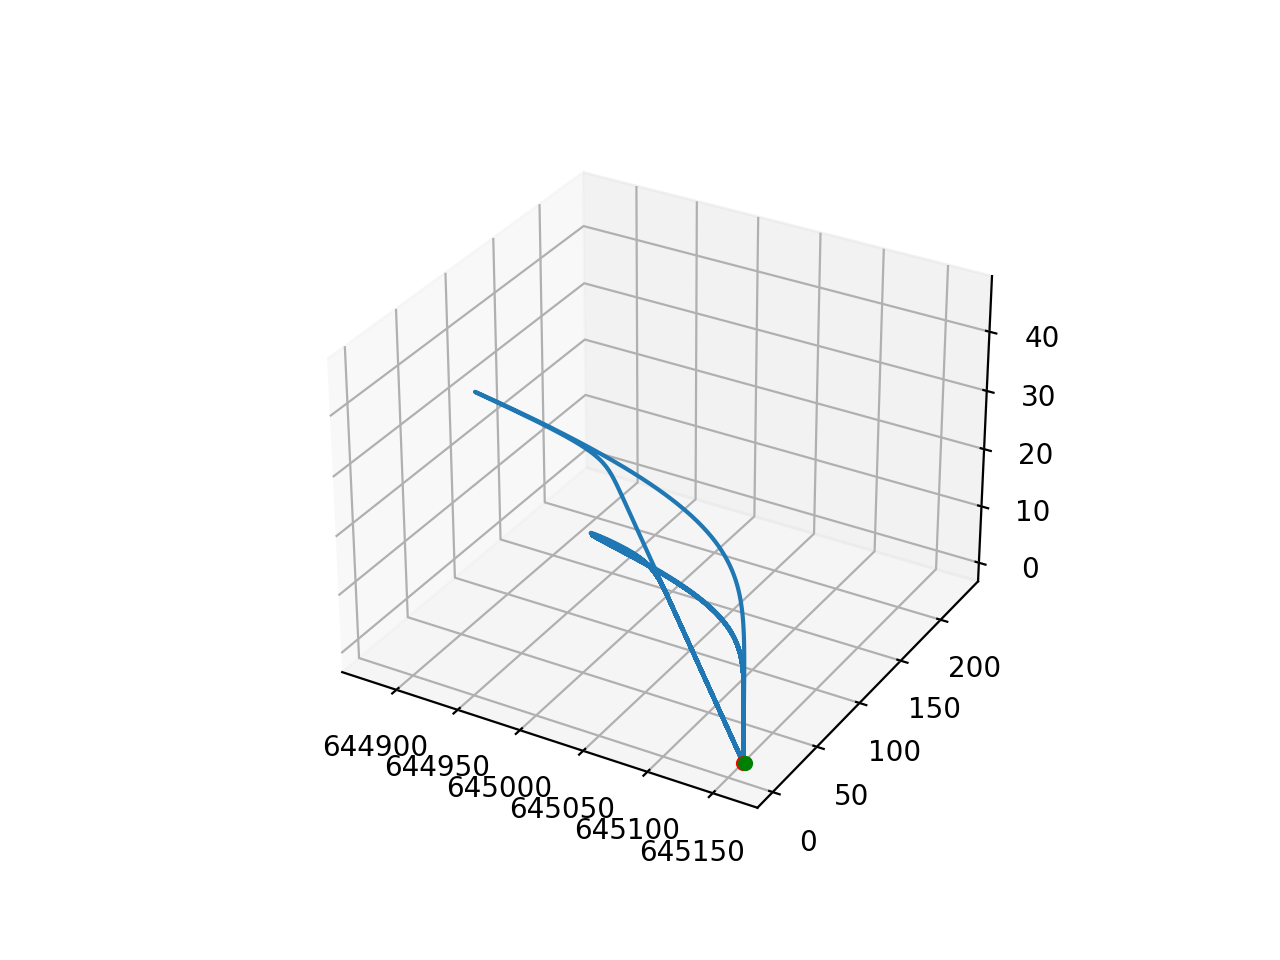

In [60]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


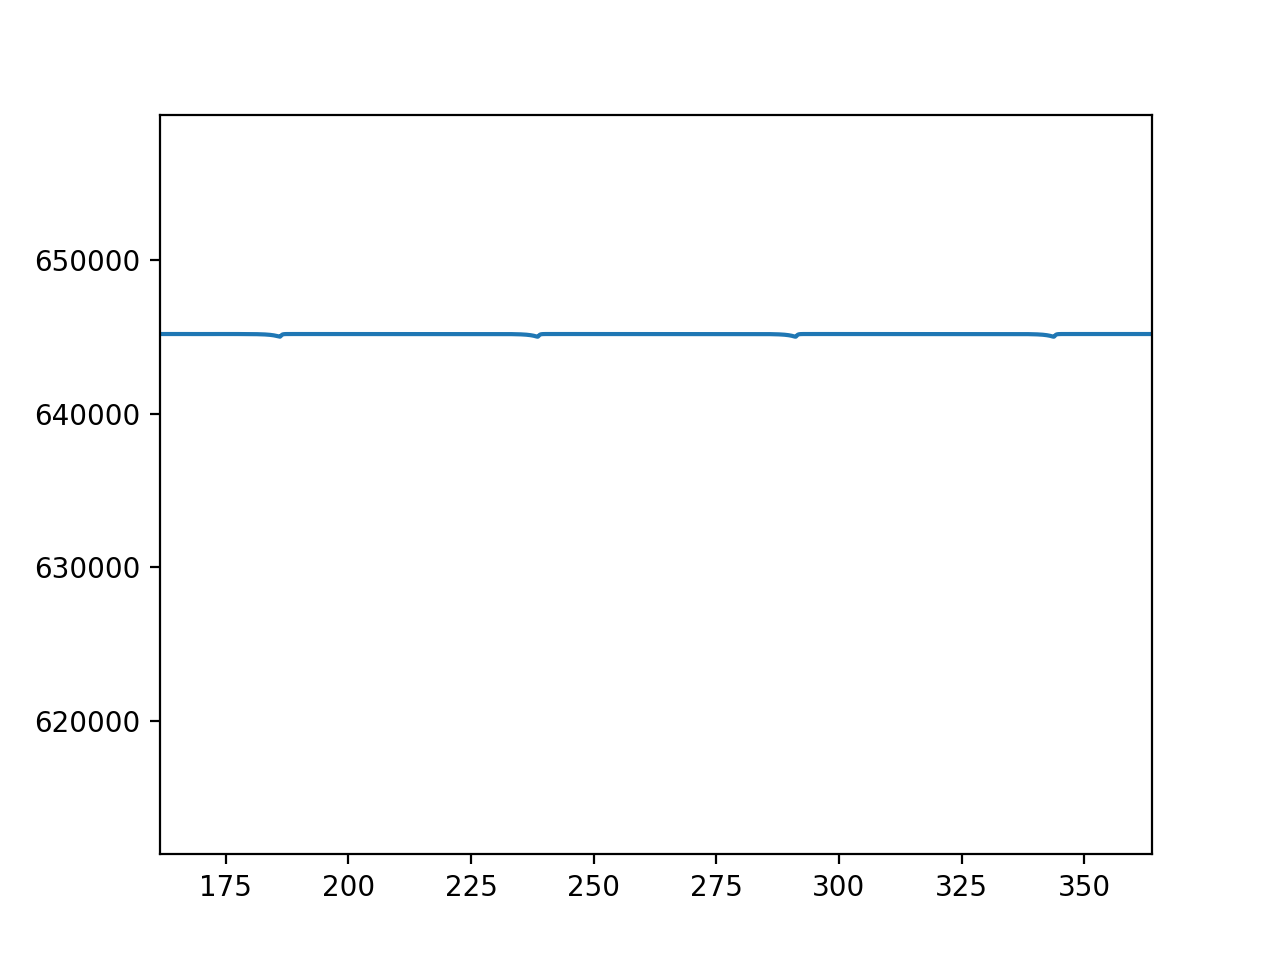

In [61]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Architype - 3b #
* Multiple frequencies in C & P

In [62]:
i=58
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(3.160613444, 1.67e-05, 0.061940283, 0.410426652, 0.118163009, 0.284208775, 0.304151886, 0.431856848, 0.330813484, 0.070630919)
3.3063495999667794


<IPython.core.display.Javascript object>


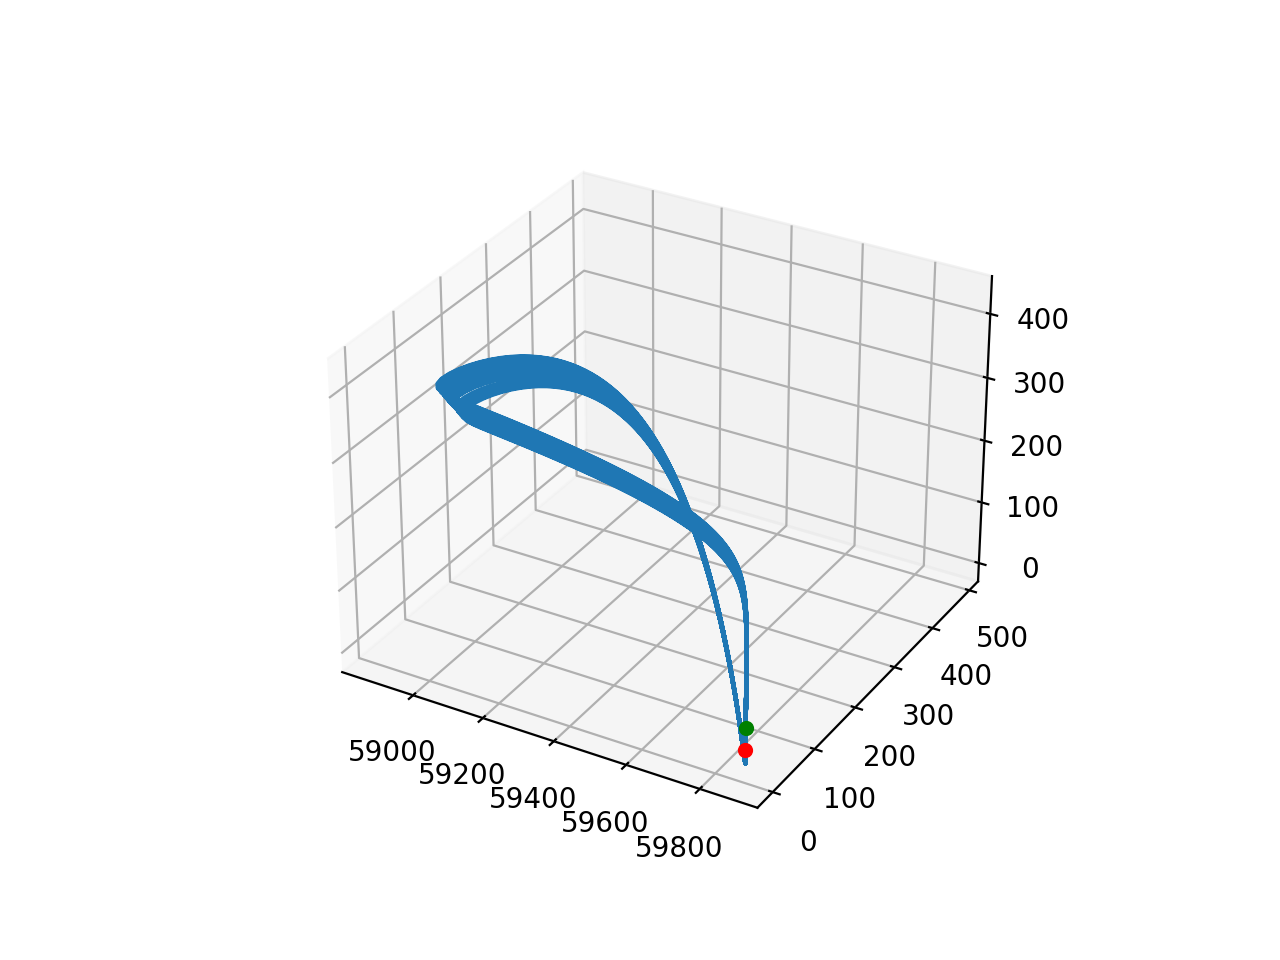

In [63]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


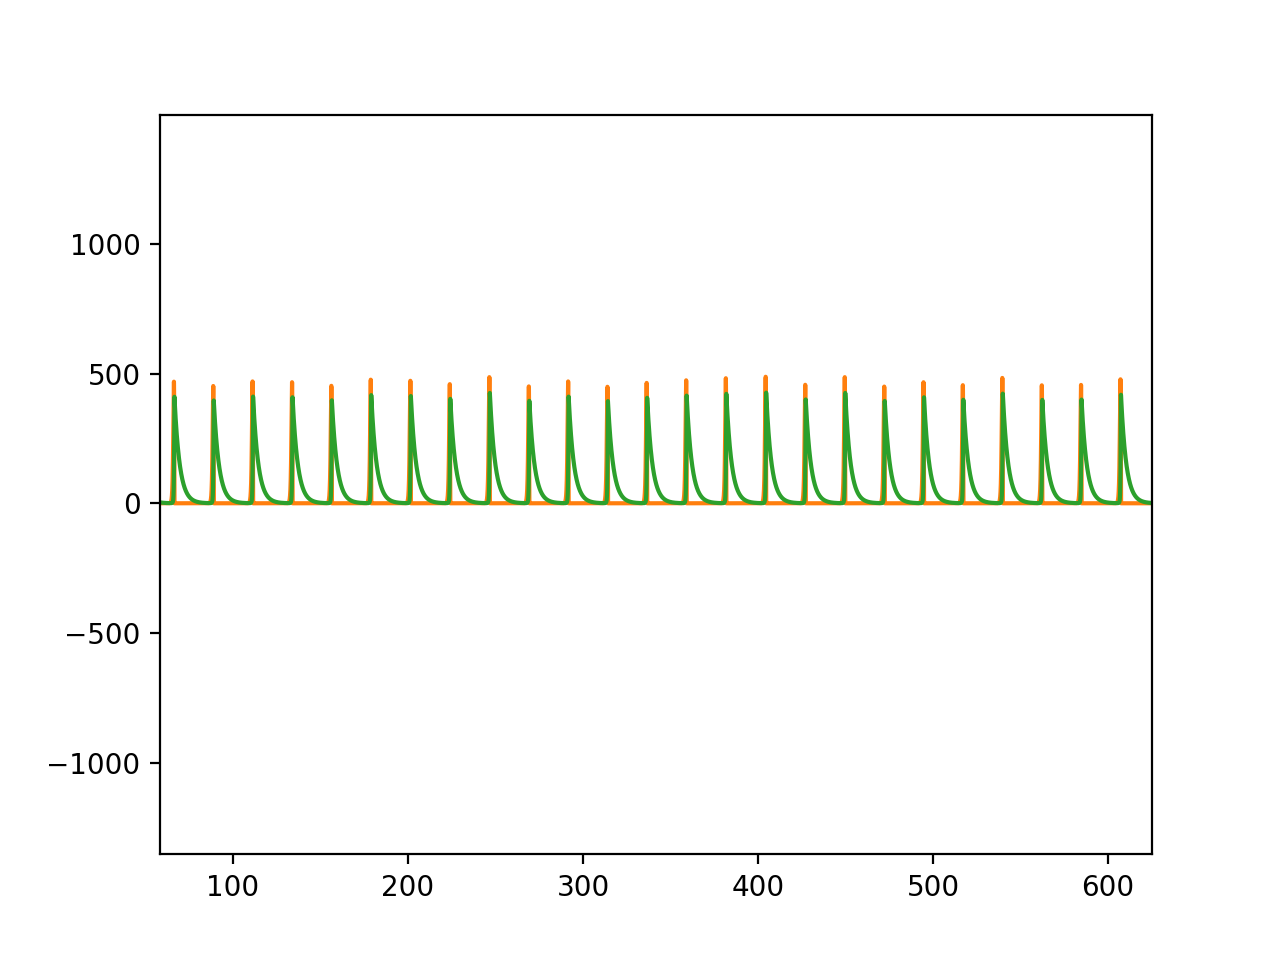

In [64]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)


# Architype 6 #
* All the 3 state variables decline over time. 
* P & C settle into a constant amplitude over time 
* P declines to 0

In [65]:
i=60
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(1.548949006, 7.55e-05, 0.476150692, 0.398274277, 0.008431435, 0.539342551, 0.253831866, 0.134525887, 0.065817513, 0.378031321)
1.6872568000108004


<IPython.core.display.Javascript object>


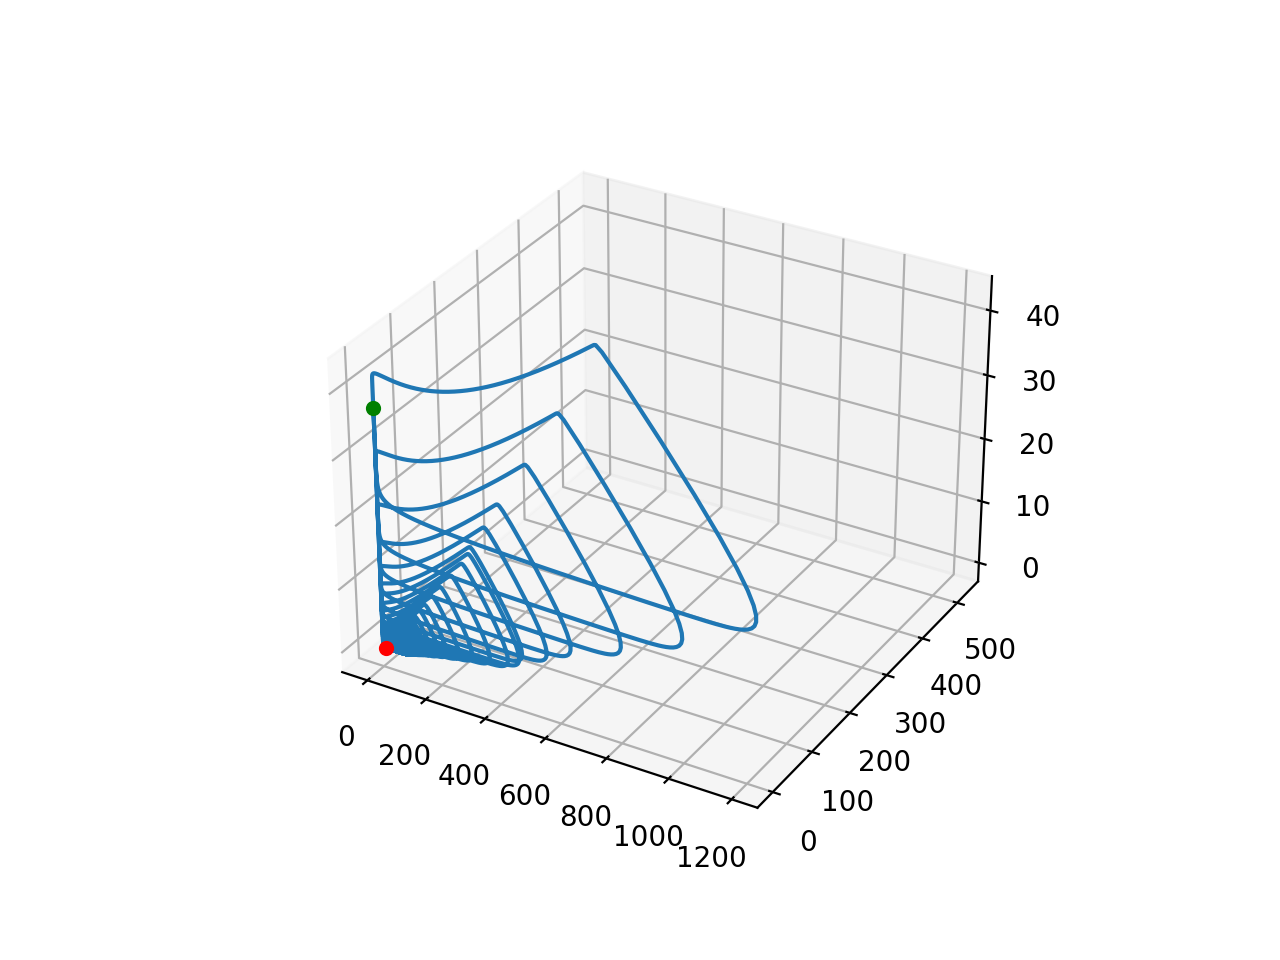

In [66]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


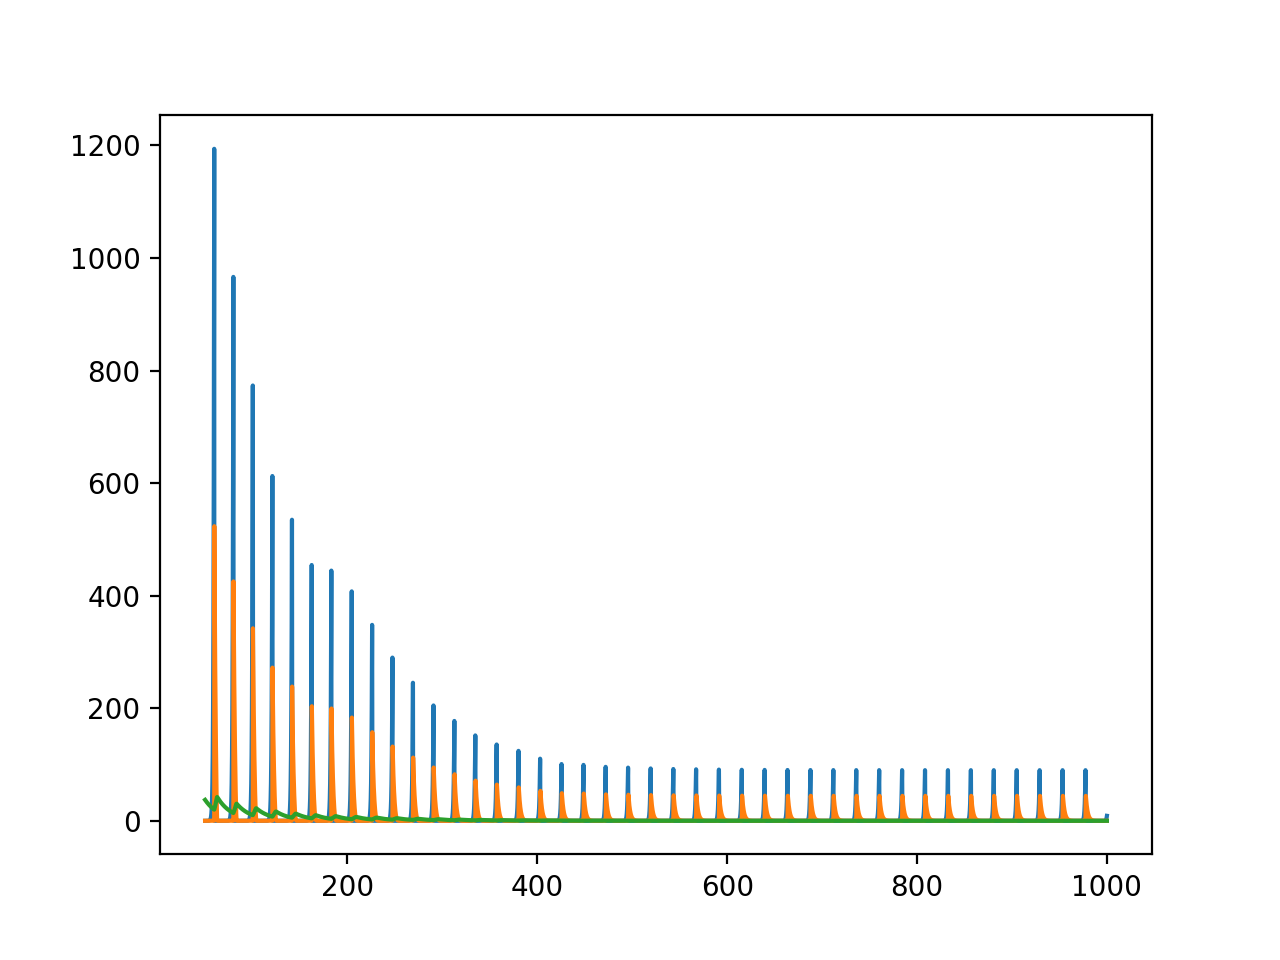

In [67]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)


# Architype 7 #
* 3D reduces to 1D with no consumers and predators
* No oscillations in the state variables

In [68]:
i=1
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(1.997472577, 1.38e-05, 0.040016285, 0.008586495, 0.373373386, 0.062634868, 0.000231111, 0.407125218, 0.321934795, 0.122792118)
0.18308800004888326


<IPython.core.display.Javascript object>


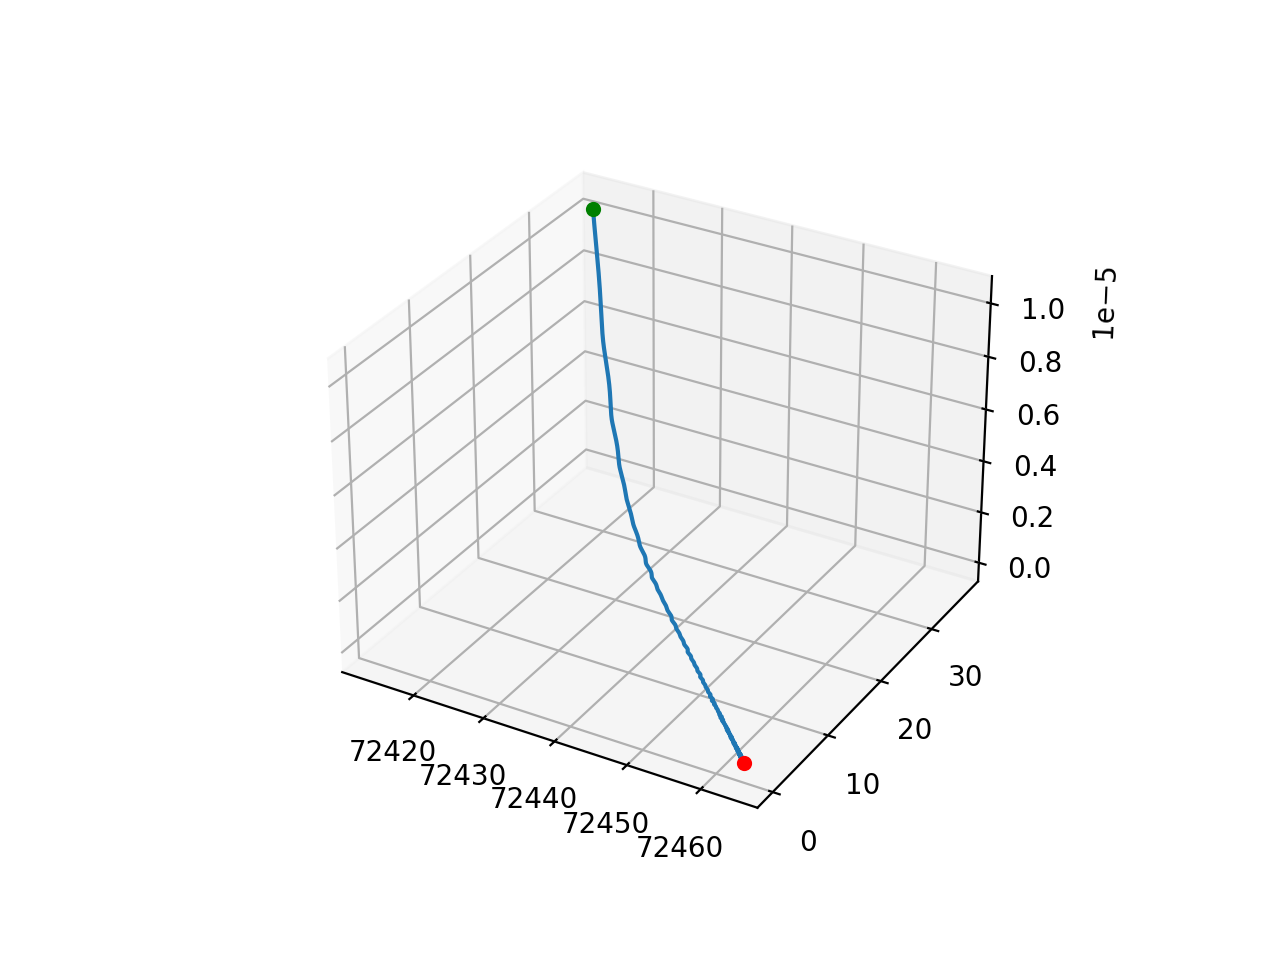

In [69]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


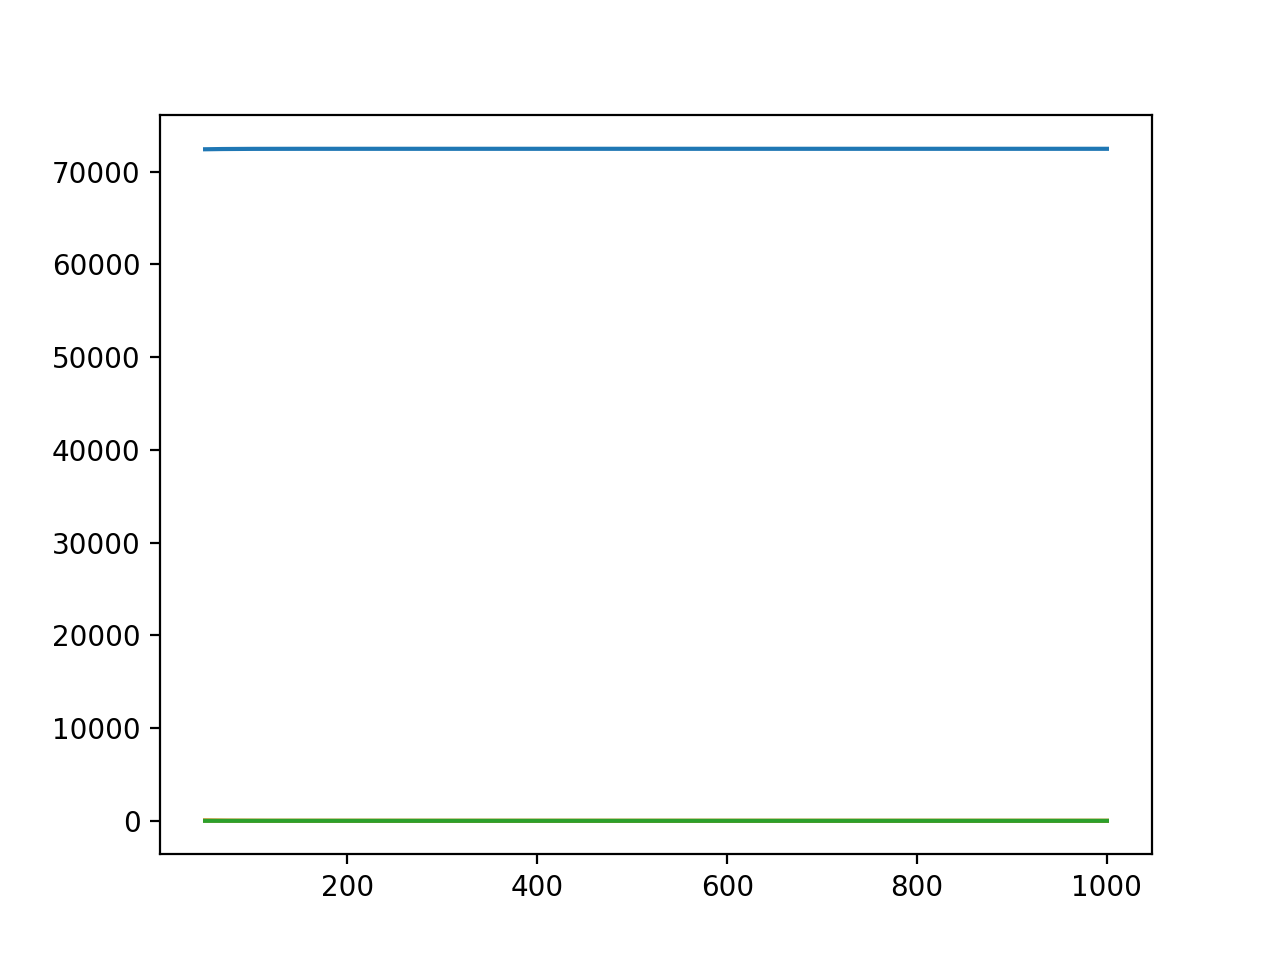

In [70]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)


# Architype - 8 #
* 3D to 1D but we find some small amplitude oscillations

In [71]:
i=8
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(4.577693271, 6.76e-05, 0.224477719, 0.080468506, 0.25198289, 0.350487639, 0.365433891, 0.559687209, 0.462809434, 0.081217477)
0.4188793000066653


<IPython.core.display.Javascript object>


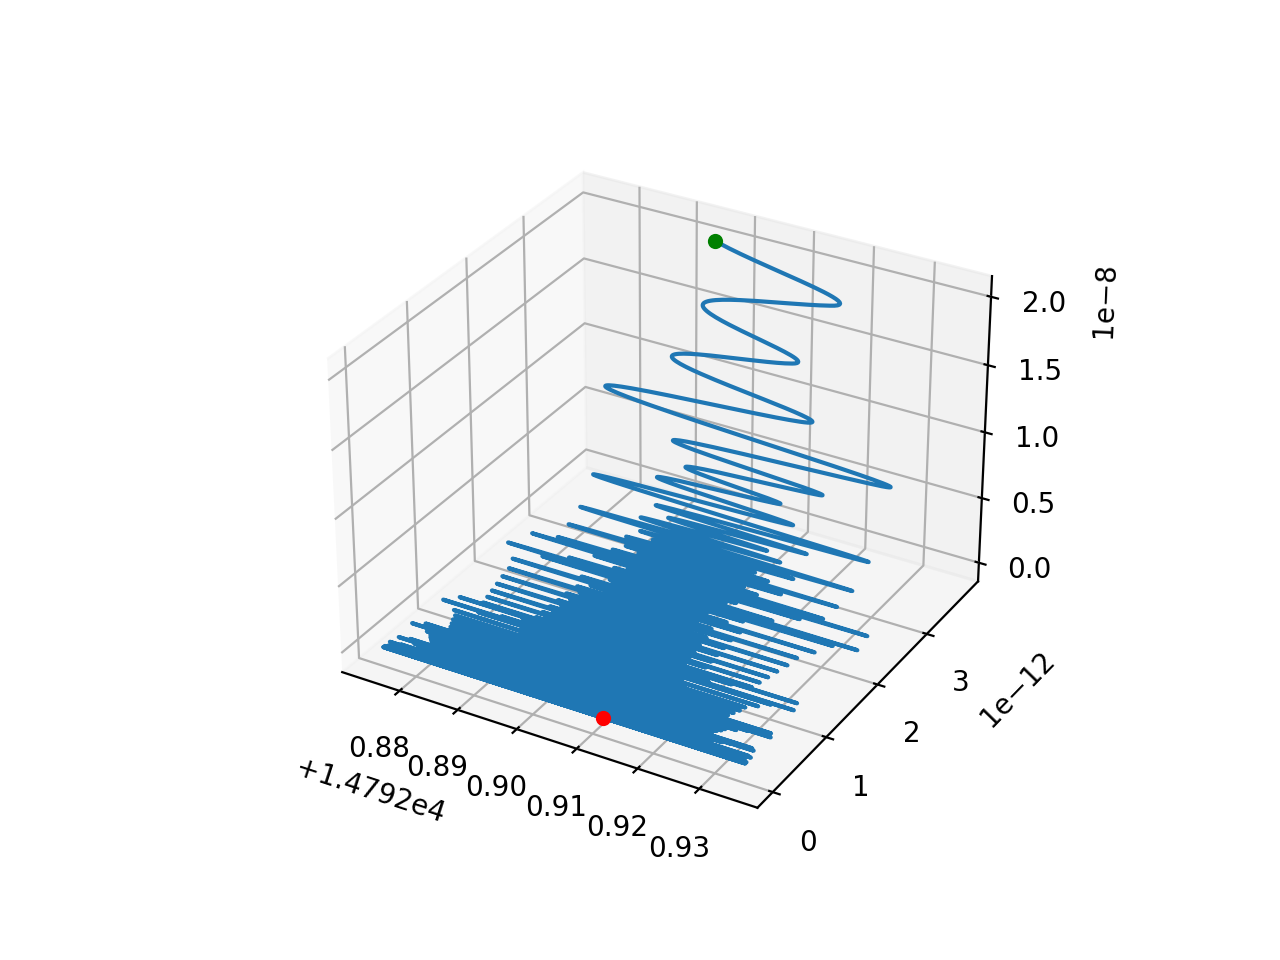

In [72]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')

<IPython.core.display.Javascript object>


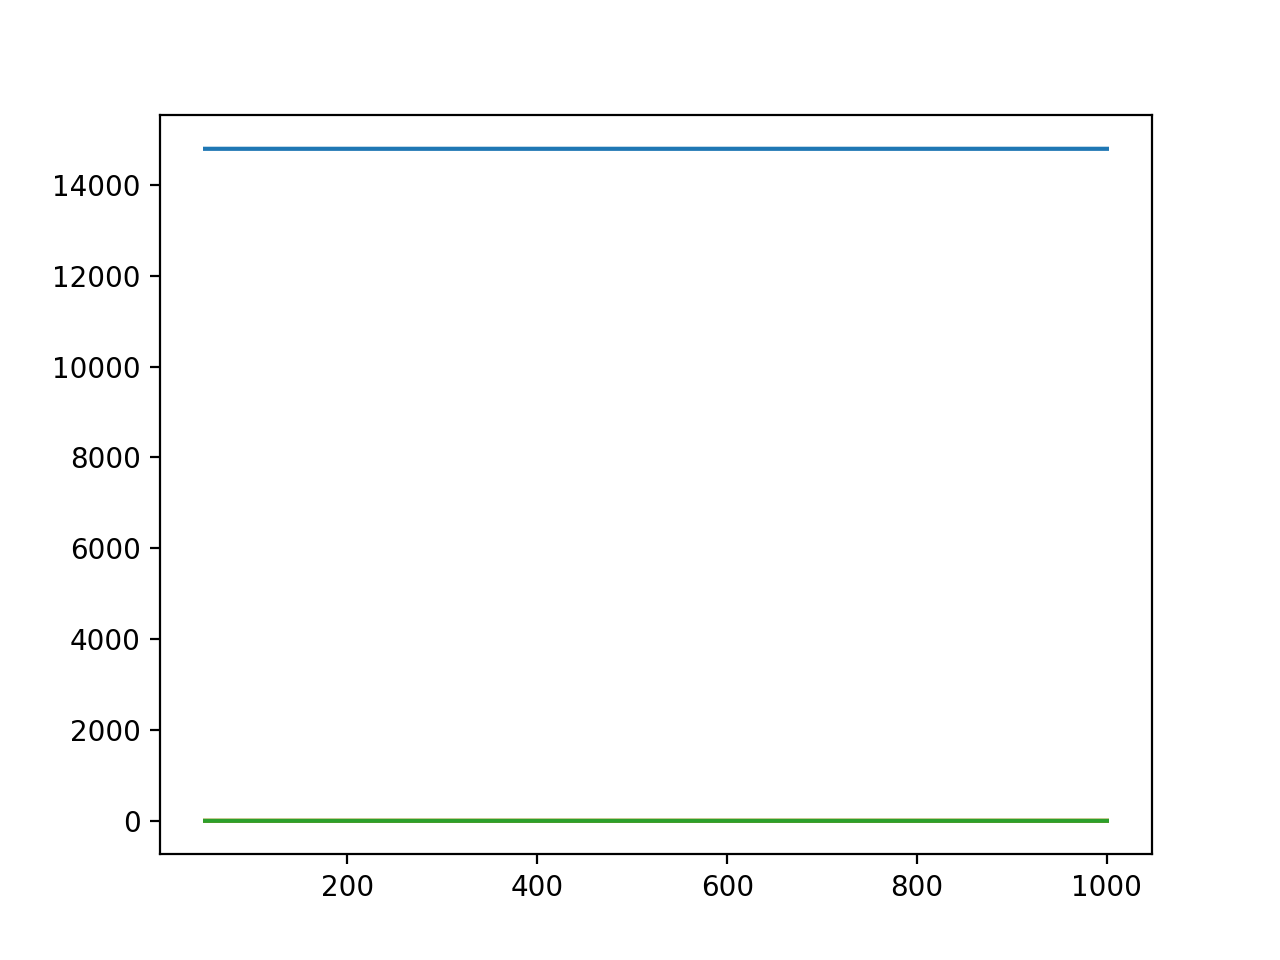

In [73]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)


# Architype - 9
* Saw-tooth oscillations of R decline to 0
* All state variables decline to 0

In [77]:
i=47
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend = 1000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]



(0.005658255, 3.86e-05, 0.491620718, 0.280261092, 0.222702714, 0.13418949, 0.106194631, 0.548513054, 0.110837954, 0.244898799)
0.17354280001018196


<IPython.core.display.Javascript object>


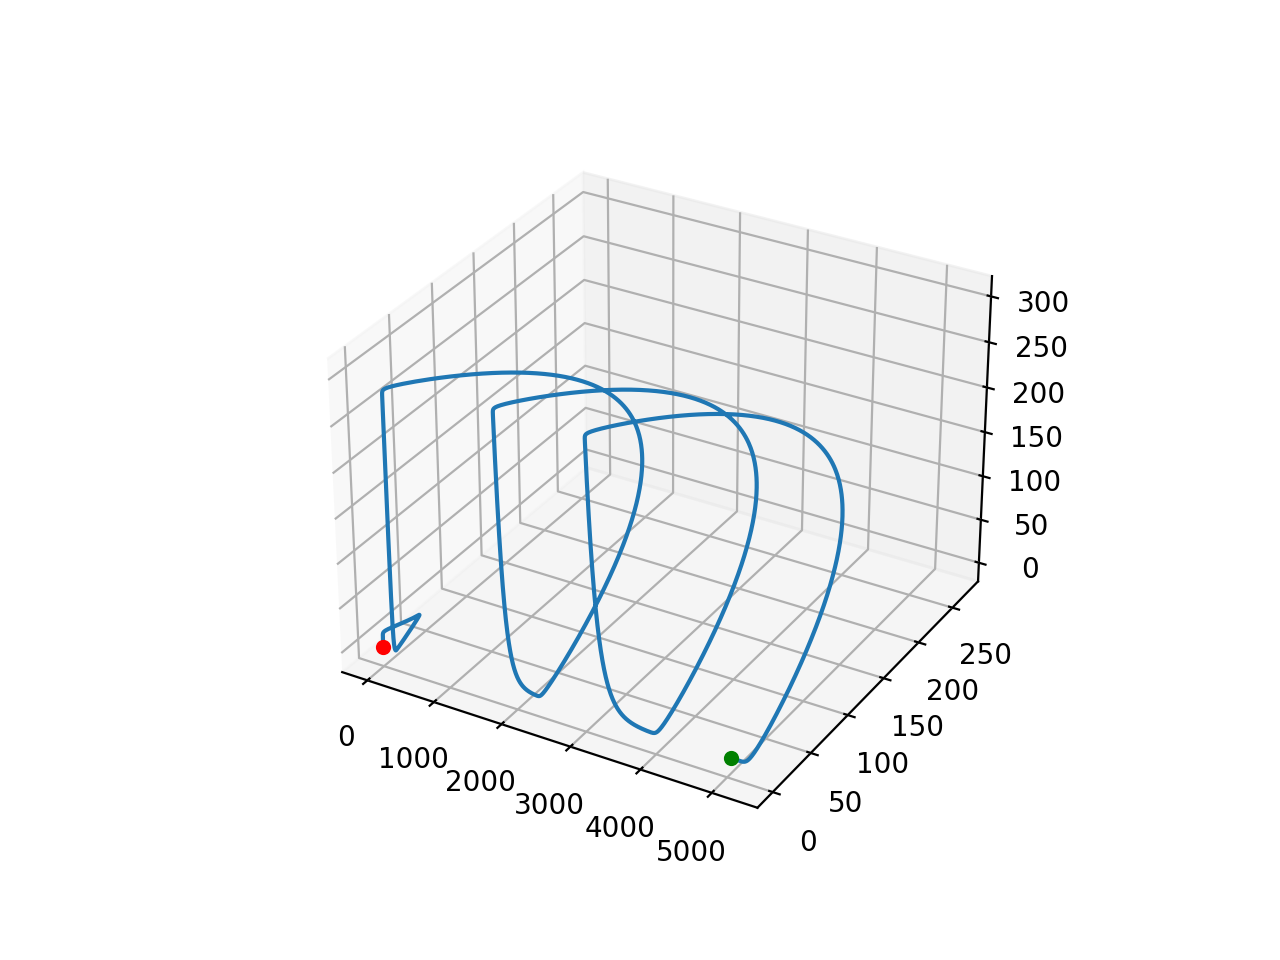

In [78]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


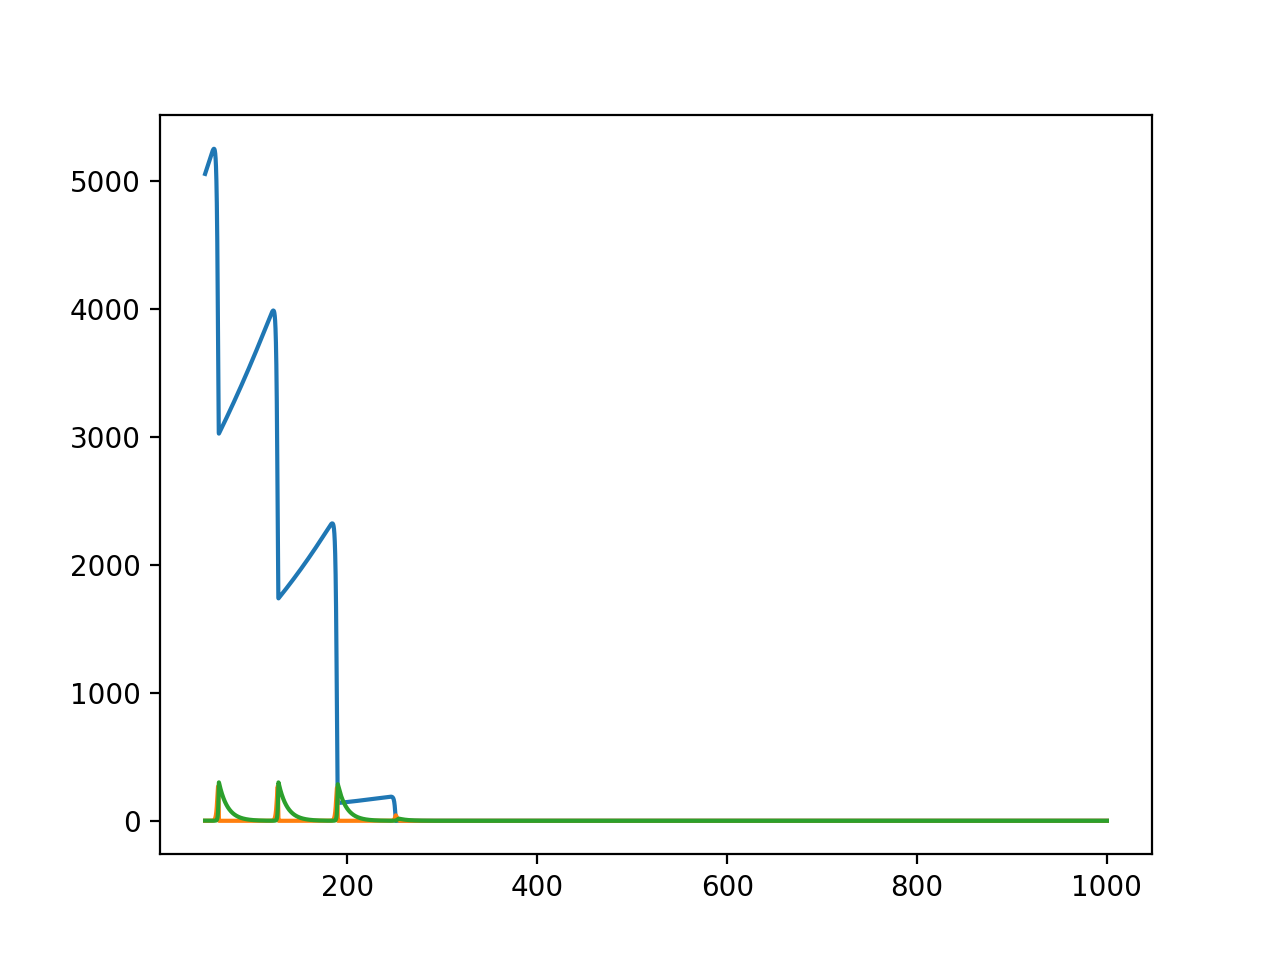

In [79]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

# Checking

In [111]:
i = 486
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)    
tend =9000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)


start_time = timeit.default_timer()
sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


ssv = sl2.y[:,5000:]
tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

(0.059758447, 3.43e-05, 0.196717745, 0.265599397, 0.426775114, 0.027952532, 0.676393376, 0.272445687, 0.147917916, 0.583108233)
2.12153440003749


<IPython.core.display.Javascript object>


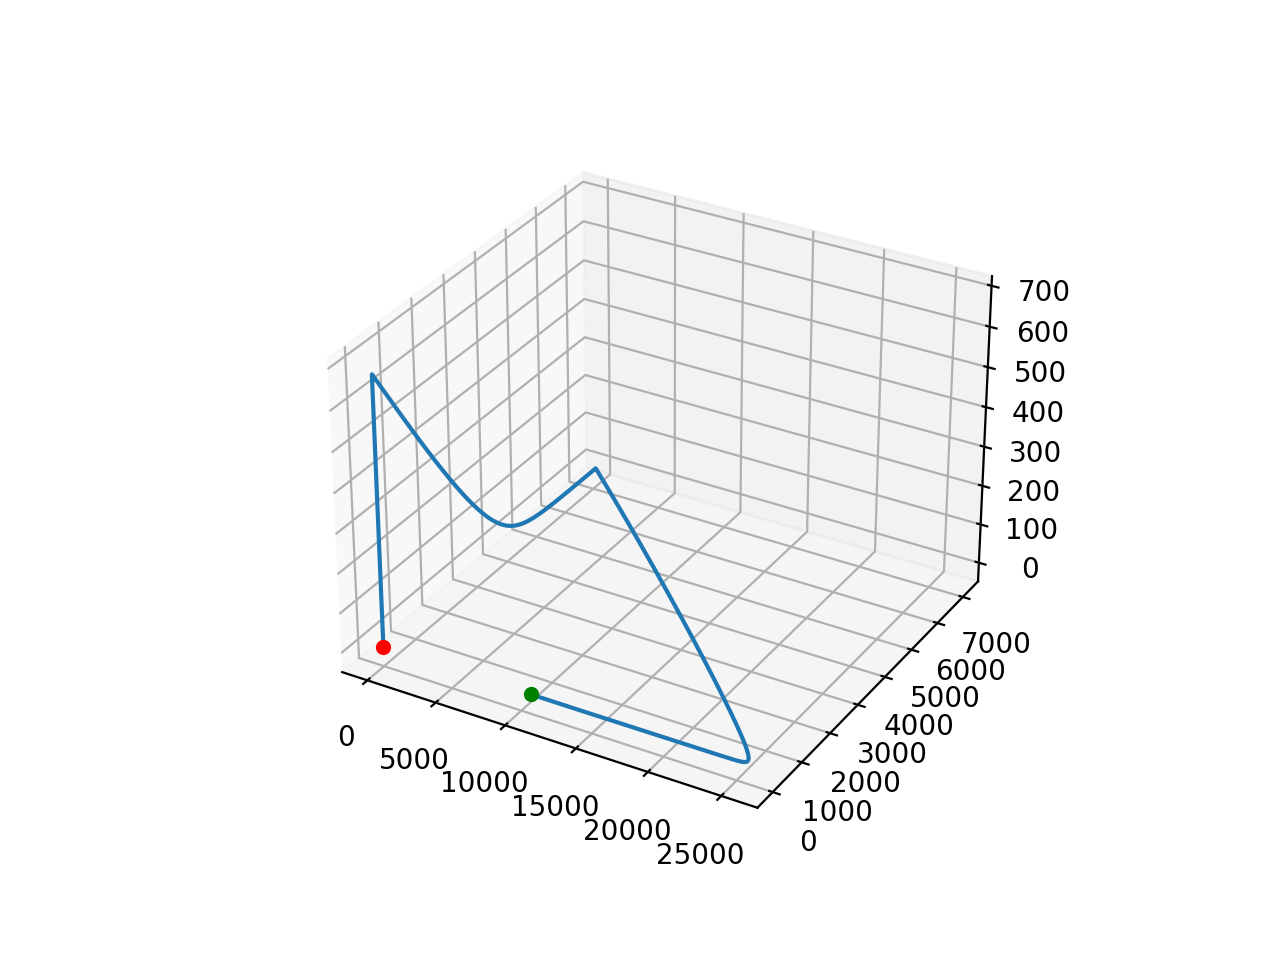

In [112]:
Rst = R[0]; Cst = C[0]; Pst = P[0] 
Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.scatter(Rst, Cst, Pst, color='g')
ax.scatter(Rend, Cend, Pend, color='r')


<IPython.core.display.Javascript object>


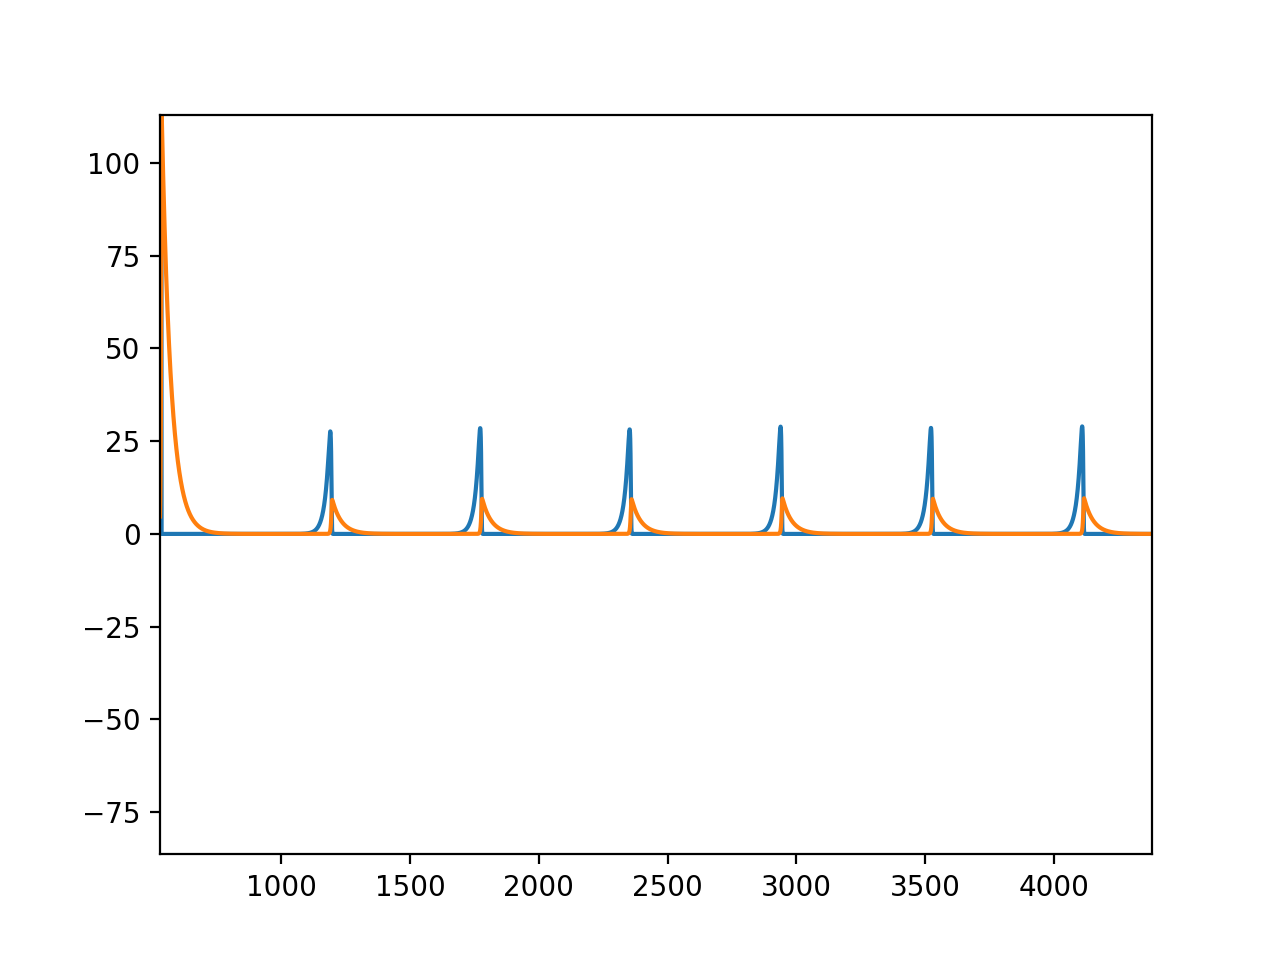

In [115]:
%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
#plt.plot(tm, P)